-------------------------------------------------------------------------------------------------------
# SCENARIO ANALYSIS: 
-------------------------------------------------------------------------------------------------------
## Baseline + Basic, Moderate, and Advanced Retrofit
## No IRA and IRA-Reference
-------------------------------------------------------------------------------------------------------

In [1]:
print("""
=====================================================================================================================================================================
SCENARIO ANALYSIS:
Baseline + Basic, Moderate, and Advanced Retrofit
No IRA and IRA-Reference Scenarios
=====================================================================================================================================================================
Baseline Scenario: Existing U.S. Housing Stock in 2018
      
Retrofit Scenarios:
- Basic Retrofit (MP8)
- Moderate Retrofit (MP9)
- Advanced Retrofit (MP10)

No IRA Scenario:
- AEO2023 No Inflation Reduction Act
- Cambium 2021 MidCase
      
IRA-Reference Scenario:
- AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
- Cambium 2022 and 2023 MidCase

----------------------------------------------------------------------------------------------
""", "\n")


SCENARIO ANALYSIS:
Baseline + Basic, Moderate, and Advanced Retrofit
No IRA and IRA-Reference Scenarios
Baseline Scenario: Existing U.S. Housing Stock in 2018
      
Retrofit Scenarios:
- Basic Retrofit (MP8)
- Moderate Retrofit (MP9)
- Advanced Retrofit (MP10)

No IRA Scenario:
- AEO2023 No Inflation Reduction Act
- Cambium 2021 MidCase
      
IRA-Reference Scenario:
- AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
- Cambium 2022 and 2023 MidCase

----------------------------------------------------------------------------------------------
 



In [2]:
# # Check required packages and dependencies:
# !pip freeze > requirements.txt

In [3]:
from config import PROJECT_ROOT
print(f"Imported PROJECT_ROOT from config.py: {PROJECT_ROOT}")

from datetime import datetime

# Get the current datetime
# Start the timer
start_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Format the name of the exported results file using the location ID
result_export_time = datetime.now()
model_run_date_time = result_export_time.strftime("%Y-%m-%d_%H-%M")

Project root directory: c:\users\14128\research\cmu-tare-model
Imported PROJECT_ROOT from config.py: c:\users\14128\research\cmu-tare-model


In [4]:
import os
from IPython import get_ipython

import pandas as pd

# Data Visualization Functions
from cmu_tare_model.utils.data_visualization import *

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['font.family'] = 'sans-serif' # Set the font for Matplotlib
plt.rcParams['font.sans-serif'] = 'Arial' # Set the font for Matplotlib

# At the beginning of your notebook or script
plt.close('all')  # Close any existing figures before creating new ones
# For Jupyter notebooks, ensure you have this at the top
%matplotlib inline

# Seaborn
import seaborn as sns
sns.set_theme(font='sans-serif', style='darkgrid') # Set the font and grid style for Seaborn

In [5]:
# pd.set_option("display.max_columns", None)
# pd.reset_option('display.max_columns')
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [6]:
# Select whether to begin new run or visualize existing model outputs
while True:
    try:
        start_new_model_run = str(input("""
Would you like to begin a new simulation or visualize output results from a previous model run? Please enter one of the following:
Y. I'd like to start a new model run.
N. I'd like to visualize output results from a previous model run.""")).upper()

        print(f"Enter the following input: {start_new_model_run}")

        if start_new_model_run == 'Y':
            print(f"Formatted date for use in file name: {model_run_date_time}")

            print(f"Project root directory: {PROJECT_ROOT}")

            # Relative path to the file from the project root
            relative_path = os.path.join("cmu_tare_model", "model_scenarios", "tare_run_simulation_v2_1.ipynb")

            # Construct the absolute path to the file
            file_path = os.path.join(PROJECT_ROOT, relative_path)
            print(f"File path: {file_path}")

            # Storing Result Outputs in output_results folder
            output_folder_path = os.path.join(PROJECT_ROOT, "cmu_tare_model", "output_results")
            print(f"Result outputs will be exported here: {output_folder_path}")

            # On Windows, to avoid any path-escape quirks, convert backslashes to forward slashes
            file_path = file_path.replace("\\", "/")

            print(f"Running file: {file_path}")

            # iPthon magic command to run a .py file and import variables into the current IPython session
            if os.path.exists(file_path):
                get_ipython().run_line_magic('run', f'-i {file_path}')  # If your path has NO spaces, no quotes needed.
            else:
                print(f"File not found: {file_path}")

            break  # Exit the loop if input is 'Y'
            
        elif start_new_model_run == 'N':
            # Enter the date time of the model run in the following format: YYYY-MM-DD_HH-MM
            model_run_date_time = str(input("Enter the date time of the model run in the following format YYYY-MM-DD_HH-MM: "))
            print(f"Project root directory: {PROJECT_ROOT}")
            
            # Storing Result Outputs in output_results folder
            output_folder_path = os.path.join(PROJECT_ROOT, "cmu_tare_model", "output_results")
            print(f"Result outputs will be exported here: {output_folder_path}")
            
            break  # Exit the loop if input is 'N'
        
        else:
            print("Invalid input. Please enter 'Y' or 'N'.")
    
    # except Exception as e:
    #     print("Invalid input. Please try again.")

    except Exception as e:
        print("An error occurred:", e)
        print("Please try again.")


Enter the following input: Y
Formatted date for use in file name: 2025-06-04_04-41
Project root directory: c:\users\14128\research\cmu-tare-model
File path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\model_scenarios\tare_run_simulation_v2_1.ipynb
Result outputs will be exported here: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results
Running file: c:/users/14128/research/cmu-tare-model/cmu_tare_model/model_scenarios/tare_run_simulation_v2_1.ipynb

The results will be exported using the export_model_run_output function.
Documentation for this function:
Export data for various result categories to appropriate directories.
    
    This function exports DataFrame results to CSV files in the appropriate 
    directory based on the results category and measure package. It supports
    the expanded sensitivity analysis categories and directory structure.
    
    Args:
        df_results_export: DataFrame containing the data to be exported.
        results_catego

In [7]:
# =======================================================================================================
# LOAD SCENARIO DATA: ORIGINAL APPROACH FOR REFERENCE (MP8)
# =======================================================================================================
# scenario_string = 'retrofit_basic_summary'
# df_outputs_basic_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
# df_outputs_basic_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
# ... and so on
from cmu_tare_model.utils.load_exported_results_to_df import load_scenario_data

print(f"""
====================================================================================================================================================================
LOAD SCENARIO DATA
====================================================================================================================================================================
The load_scenario_data function loads scenario data from a specified folder and date. Additional details are provided below:
      
Documentation for the load_scenario_data function:
{load_scenario_data.__doc__}

-----------------------------------------------------------------------------------------------
LOADING SCENARIO DATA ...

These parameters are common to all function calls:
Output folder path: {output_folder_path}
Model run date time: {model_run_date_time}
""")


LOAD SCENARIO DATA
The load_scenario_data function loads scenario data from a specified folder and date. Additional details are provided below:
      
Documentation for the load_scenario_data function:
Load scenario data from a specified folder and date.
    
    This function searches for files matching the given scenario and date
    in the specified folder path, and loads the first matching file as a
    pandas DataFrame. Includes optional chunked loading for memory efficiency
    when working with large datasets.
    
    Args:
        end_use: Description of the data being loaded (used for logging).
        output_folder_path: Base path where scenario folders are located.
        scenario_string: Path to the scenario data (can include subdirectories).
        model_run_date_time: Date/time string to filter files by (must be in filename).
        columns_to_string: Dictionary mapping column names/indices to string dtypes.
            Supports both string keys (column names) and in

-------------------------------------------------------------------------------------------------------
# Baseline Scenario: Measure Package 0 (MP0)
-------------------------------------------------------------------------------------------------------

In [8]:
# =======================================================================================================
# Baseline Scenario: Measure Package 0 (MP0)
# =======================================================================================================
columns_to_string = {16: str, 19: str, 20: str}
menu_mp = 0

scenario_string = 'baseline_summary\summary_baseline'

print(f"""
=======================================================================================================
Baseline Scenario: Measure Package 0 (MP0)
=======================================================================================================
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_baseline_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_baseline_home)


Baseline Scenario: Measure Package 0 (MP0)
Scenario Relative Path: baseline_summary\summary_baseline
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\baseline_summary\summary_baseline
Loading Whole-Home data in chunks of 50,000 rows...
  Loaded chunk 5 (50,000 rows)
  Successfully combined 7 chunks into DataFrame with shape (331531, 180)
Loaded Whole-Home data for policy_scenario 'baseline_summary\summary_baseline' 

         square_footage census_region     census_division  \
bldg_id                                                     
239              1690.0         South  East South Central   
273              1690.0         South  East South Central   
307              1220.0         South  East South Central   
409              1220.0         South  East South Central   
517              1220.0         South  East South Central   
...                 

In [9]:
# # This creates a column in each dataframe for the specified end-use undergoing retrofit
# # This is helpful because older functions can be used without undergoing major refactoring and testing

# # Heating End-use Category and Base Fuel Column
# df_outputs_baseline_heating['end_use'] = 'heating'
# df_outputs_baseline_heating['base_fuel'] = df_outputs_baseline_home['base_heating_fuel']

# # Water Heating End-use Category and Base Fuel Column
# df_outputs_baseline_waterHeating['end_use'] = 'waterHeating'
# df_outputs_baseline_waterHeating['base_fuel'] = df_outputs_baseline_home['base_waterHeating_fuel']

# # Clothes Drying End-use Category and Base Fuel Column
# df_outputs_baseline_clothesDrying['end_use'] = 'clothesDrying'
# df_outputs_baseline_clothesDrying['base_fuel'] = df_outputs_baseline_home['base_clothesDrying_fuel']

# # Cooking End-use Category and Base Fuel Column
# df_outputs_baseline_cooking['end_use'] = 'cooking'
# df_outputs_baseline_cooking['base_fuel'] = df_outputs_baseline_home['base_cooking_fuel']

-------------------------------------------------------------------------------------------------------
# Basic Retrofit: Measure Package 8 (MP8)
-------------------------------------------------------------------------------------------------------

In [10]:
# =======================================================================================================
# BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
columns_to_string = {16: str, 19: str, 20: str}
menu_mp=8

# ========================== BASIC-AP2  ========================== 
scenario_string = 'retrofit_basic_summary/summary_basic_ap2'

print(f"""
=======================================================================================================
BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_basic_home_ap2 = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_basic_home_ap2)

# ========================== BASIC-EASIUR  ========================== 
scenario_string = 'retrofit_basic_summary/summary_basic_easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_basic_home_easiur = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_basic_home_easiur)

# ========================== BASIC-InMAP ========================== 
scenario_string = 'retrofit_basic_summary/summary_basic_inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_basic_home_inmap = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_basic_home_inmap)


BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: retrofit_basic_summary/summary_basic_ap2
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\retrofit_basic_summary/summary_basic_ap2
Loading Whole-Home data in chunks of 50,000 rows...
  Loaded chunk 5 (50,000 rows)
  Successfully combined 7 chunks into DataFrame with shape (331531, 824)
Loaded Whole-Home data for policy_scenario 'retrofit_basic_summary/summary_basic_ap2' 

         square_footage census_region     census_division  \
bldg_id                                                     
239              1690.0         South  East South C

-------------------------------------------------------------------------------------------------------
# Moderate Retrofit: Measure Package 9 (MP9)
-------------------------------------------------------------------------------------------------------

In [11]:
# =======================================================================================================
# MODERATE RETROFIT: MEASURE PACKAGE 9 (MP9) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
columns_to_string = {16: str, 19: str, 20: str}
menu_mp = 9

# ========================== MODERATE-AP2  ========================== 
scenario_string = 'retrofit_moderate_summary/summary_moderate_ap2'

print(f"""
=======================================================================================================
MODERATE RETROFIT: MEASURE PACKAGE 9 (MP9) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_moderate_home_ap2 = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_moderate_home_ap2)

# ========================== MODERATE-EASIUR  ========================== 
scenario_string = 'retrofit_moderate_summary/summary_moderate_easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_moderate_home_easiur = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_moderate_home_easiur)

# ========================== MODERATE-InMAP ========================== 
scenario_string = 'retrofit_moderate_summary/summary_moderate_inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_moderate_home_inmap = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_moderate_home_inmap)


MODERATE RETROFIT: MEASURE PACKAGE 9 (MP9) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: retrofit_moderate_summary/summary_moderate_ap2
Loading data for Whole-Home and Heating ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\retrofit_moderate_summary/summary_moderate_ap2
Loading Whole-Home data in chunks of 50,000 rows...
  Loaded chunk 5 (50,000 rows)
  Successfully combined 7 chunks into DataFrame with shape (331531, 840)
Loaded Whole-Home data for policy_scenario 'retrofit_moderate_summary/summary_moderate_ap2' 

         square_footage census_region     census_division  \
bldg_id                                                     
239              1690.0         South  East South Central   
273   

-------------------------------------------------------------------------------------------------------
# Advanced Retrofit: Measure Package 10 (MP10)
-------------------------------------------------------------------------------------------------------

In [12]:
# =======================================================================================================
# ADVANCED RETROFIT: MEASURE PACKAGE 10 (MP10) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
columns_to_string = {16: str, 19: str, 20: str, 213: str}
menu_mp = 10

# ========================== ADVANCED-AP2  ========================== 
scenario_string = 'retrofit_advanced_summary/summary_advanced_ap2'

print(f"""
=======================================================================================================
ADVANCED RETROFIT: MEASURE PACKAGE 10 (MP10) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_advanced_home_ap2 = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_advanced_home_ap2)

# ========================== ADVANCED-EASIUR  ========================== 
scenario_string = 'retrofit_advanced_summary/summary_advanced_easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_advanced_home_easiur = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_advanced_home_easiur)

# ========================== ADVANCED-InMAP ========================== 
scenario_string = 'retrofit_advanced_summary/summary_advanced_inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_advanced_home_inmap = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_advanced_home_inmap)


ADVANCED RETROFIT: MEASURE PACKAGE 10 (MP10) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: retrofit_advanced_summary/summary_advanced_ap2
Loading data for Whole-Home and Heating ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\retrofit_advanced_summary/summary_advanced_ap2
Loading Whole-Home data in chunks of 50,000 rows...
  Loaded chunk 5 (50,000 rows)
  Successfully combined 7 chunks into DataFrame with shape (331531, 855)
Loaded Whole-Home data for policy_scenario 'retrofit_advanced_summary/summary_advanced_ap2' 

         square_footage census_region     census_division  \
bldg_id                                                     
239              1690.0         South  East South Central   
273 

# Adoption Rate Scenario Comparison

In [13]:
from cmu_tare_model.adoption_potential.determine_adoption_potential_sensitivity_robust import * 
from cmu_tare_model.adoption_potential.data_processing.visuals_adoption_potential import (
    create_multiIndex_adoption_df,
    subplot_grid_adoption_vBar
)

print(f"""  
====================================================================================================================================================================
ADOPTION POTENTIAL VISUALIZATION
====================================================================================================================================================================

--------------------------------------------------------
ADOPTION POTENTIAL
--------------------------------------------------------
determine_adoption_potential_sensitivity_robust.py file contains the definitions for:
- adoption_decision function (combined climate + health analysis)
- calculate_climate_only_adoption_robust function (climate-only analysis)
- calculate_health_only_adoption_robust function (health-only analysis)
      
Documentation for the adoption_decision function:
{adoption_decision.__doc__}

Documentation for the calculate_climate_only_adoption_robust function:
{calculate_climate_only_adoption_robust.__doc__}

Documentation for the calculate_health_only_adoption_robust function:
{calculate_health_only_adoption_robust.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------
CREATE MULTI-INDEX DF FOR ADOPTION POTENTIAL
--------------------------------------------------------
visuals_adoption_potential.py file contains the definition for the create_multiIndex_adoption_df function.

Documentation for the create_multiIndex_adoption_df function:
{create_multiIndex_adoption_df.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------
VISUALIZE ADOPTION POTENTIAL SUBPLOT GRID
--------------------------------------------------------
visuals_adoption_potential.py file contains the definition for the subplot_grid_adoption_vBar function.
      
Documentation for the subplot_grid_adoption_vBar function:
{subplot_grid_adoption_vBar.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

""")

  
ADOPTION POTENTIAL VISUALIZATION

--------------------------------------------------------
ADOPTION POTENTIAL
--------------------------------------------------------
determine_adoption_potential_sensitivity_robust.py file contains the definitions for:
- adoption_decision function (combined climate + health analysis)
- calculate_climate_only_adoption_robust function (climate-only analysis)
- calculate_health_only_adoption_robust function (health-only analysis)
      
Documentation for the adoption_decision function:

    Updates DataFrame with adoption decisions and public impacts based on NPV analysis.
    
    Simplified output for nation-level analysis while maintaining full functionality.
    
    Args:
        df: DataFrame containing home equipment data.
        menu_mp: Measure package identifier.
        policy_scenario: Policy scenario for electricity grid projections.
            Accepted values: 'No Inflation Reduction Act', 'AEO2023 Reference Case'.
        rcm_model: RC

## Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit


In [14]:
# =======================================================================================================
# SPACE HEATING ADOPTION POTENTIAL (MP8, MP9, MP10): HEALTH RCM-CRF SENSITIVITY
# =======================================================================================================
# Common parameters
scc = 'central'

# ========================== AP2  ========================== 
rcm_model = 'ap2'

print(f"""
Adoption Potential Summary Dataframes are then used to create Multi-Index Dataframes for the following:
- Retrofit Scenarios: Basic (MP8), Moderate (MP9), Advanced (MP10)
- SCC Climate Sensitivity: {scc}
- Health Sensitivity (RCM): AP2, EASIUR, InMAP
- Health Sensitivity (CR Function): 'acs' or 'h6c'

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...

""")
# Basic Retrofit (MP8)
df_mi_basic_heating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, 8, 'heating', scc, rcm_model, 'acs')
df_mi_basic_heating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, 8, 'heating', scc, rcm_model, 'h6c')
# Moderate Retrofit (MP9)
df_mi_moderate_heating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_moderate_home_ap2, 9, 'heating', scc, rcm_model, 'acs')
df_mi_moderate_heating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_moderate_home_ap2, 9, 'heating', scc, rcm_model, 'h6c')
# Advanced Retrofit (MP10)
df_mi_advanced_heating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_advanced_home_ap2, 10, 'heating', scc, rcm_model, 'acs')
df_mi_advanced_heating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_advanced_home_ap2, 10, 'heating', scc, rcm_model, 'h6c')

# ========================== EASIUR  ========================== 
rcm_model = 'easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...

""")
# Basic Retrofit (MP8)
df_mi_basic_heating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, 8, 'heating', scc, rcm_model, 'acs')
df_mi_basic_heating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, 8, 'heating', scc, rcm_model, 'h6c')
# Moderate Retrofit (MP9)
df_mi_moderate_heating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_moderate_home_easiur, 9, 'heating', scc, rcm_model, 'acs')
df_mi_moderate_heating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_moderate_home_easiur, 9, 'heating', scc, rcm_model, 'h6c')
# Advanced Retrofit (MP10)
df_mi_advanced_heating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_advanced_home_easiur, 10, 'heating', scc, rcm_model, 'acs')
df_mi_advanced_heating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_advanced_home_easiur, 10, 'heating', scc, rcm_model, 'h6c')

# ========================== InMAP ========================== 
rcm_model = 'inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...

""")
# Basic Retrofit (MP8)
df_mi_basic_heating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, 8, 'heating', scc, rcm_model, 'acs')
df_mi_basic_heating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, 8, 'heating', scc, rcm_model, 'h6c')
# Moderate Retrofit (MP9)
df_mi_moderate_heating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_moderate_home_inmap, 9, 'heating', scc, rcm_model, 'acs')
df_mi_moderate_heating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_moderate_home_inmap, 9, 'heating', scc, rcm_model, 'h6c')
# Advanced Retrofit (MP10)
df_mi_advanced_heating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_advanced_home_inmap, 10, 'heating', scc, rcm_model, 'acs')
df_mi_advanced_heating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_advanced_home_inmap, 10, 'heating', scc, rcm_model, 'h6c')


Adoption Potential Summary Dataframes are then used to create Multi-Index Dataframes for the following:
- Retrofit Scenarios: Basic (MP8), Moderate (MP9), Advanced (MP10)
- SCC Climate Sensitivity: central
- Health Sensitivity (RCM): AP2, EASIUR, InMAP
- Health Sensitivity (CR Function): 'acs' or 'h6c'

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM Model: ap2
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...



------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM

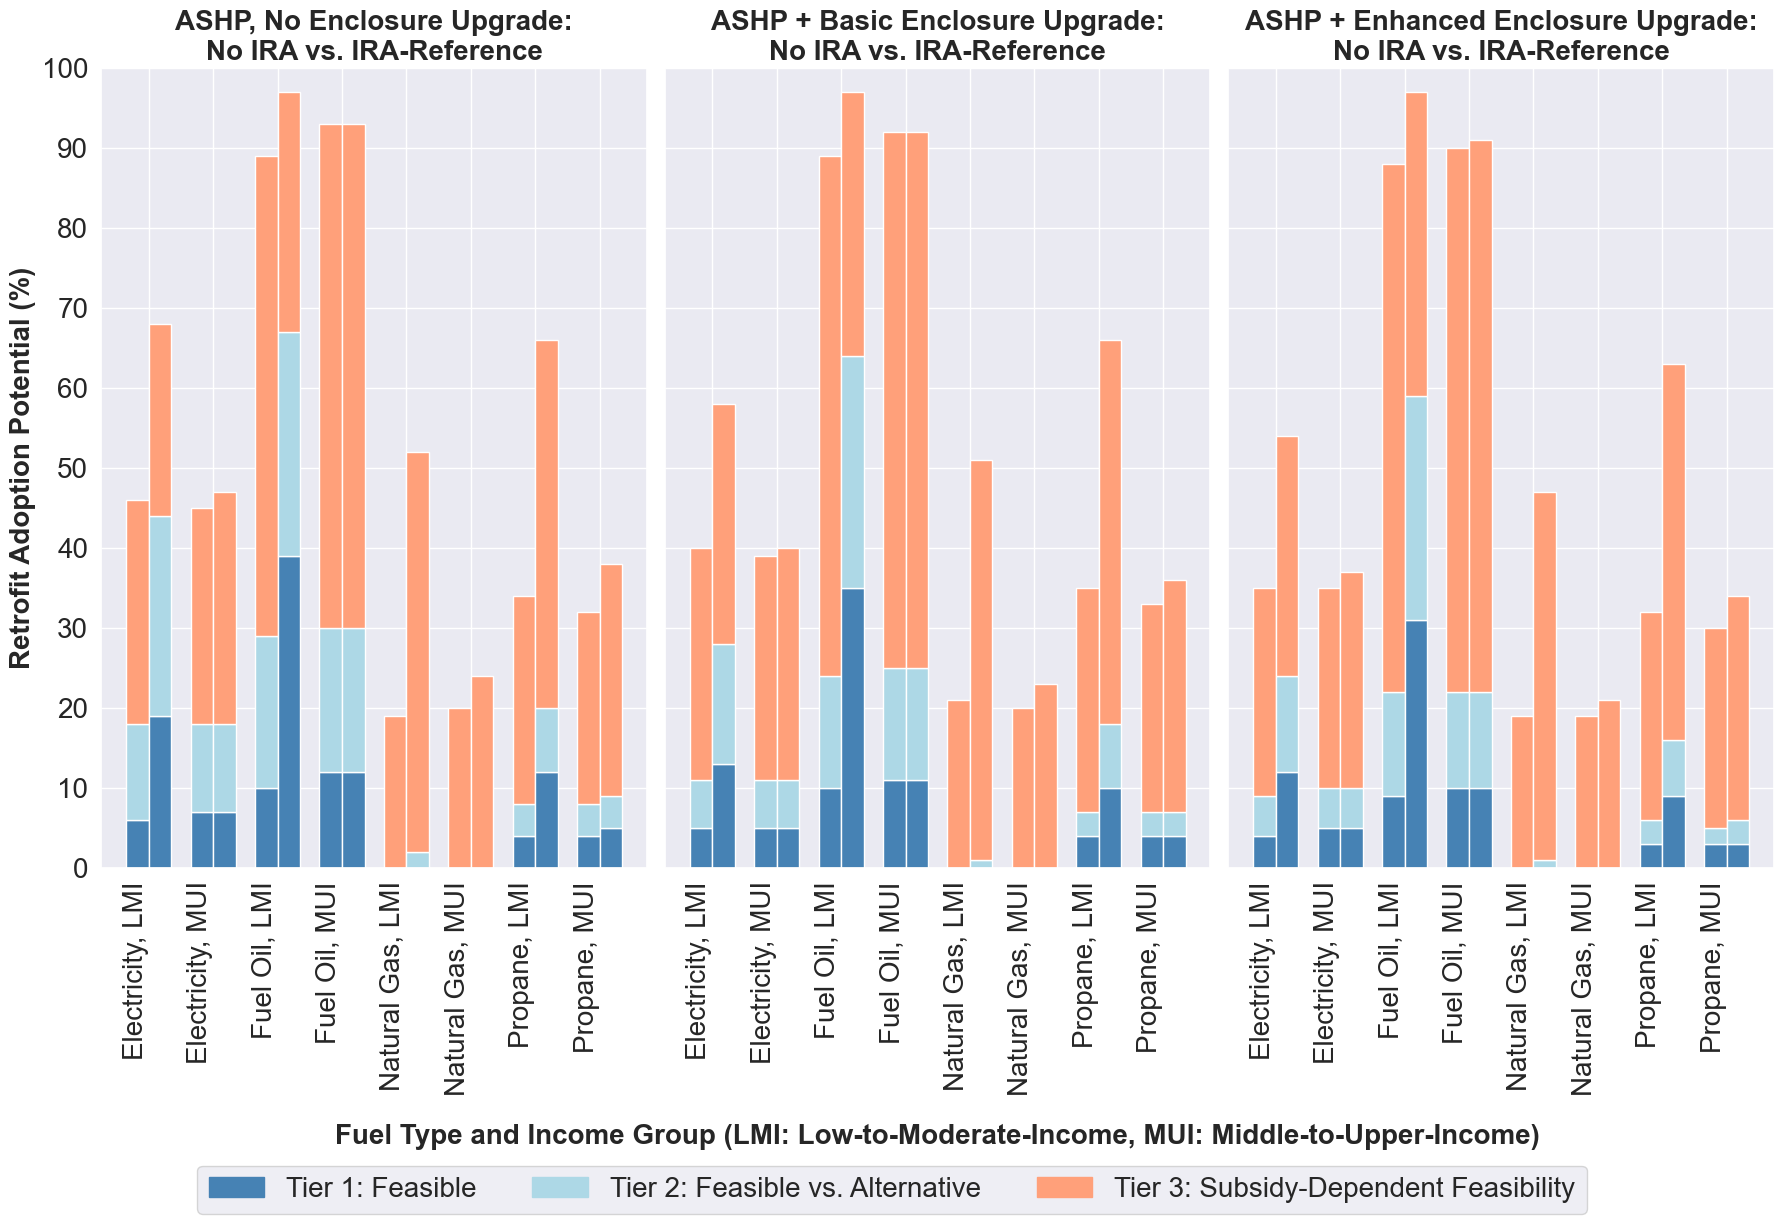

In [15]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, heating - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'ap2'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_all_HVAC_ap2_acs = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_heating_adoption_ap2_acs,
        df_mi_moderate_heating_adoption_ap2_acs, 
        df_mi_advanced_heating_adoption_ap2_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "ASHP, No Enclosure Upgrade:\nNo IRA vs. IRA-Reference", 
        "ASHP + Basic Enclosure Upgrade:\nNo IRA vs. IRA-Reference", 
        "ASHP + Enhanced Enclosure Upgrade:\nNo IRA vs. IRA-Reference"
        ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    # suptitle=f"Space Heating Air-Source Heat Pump (ASHP) Retrofit Scenario Comparison\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_all_HVAC_ap2_acs

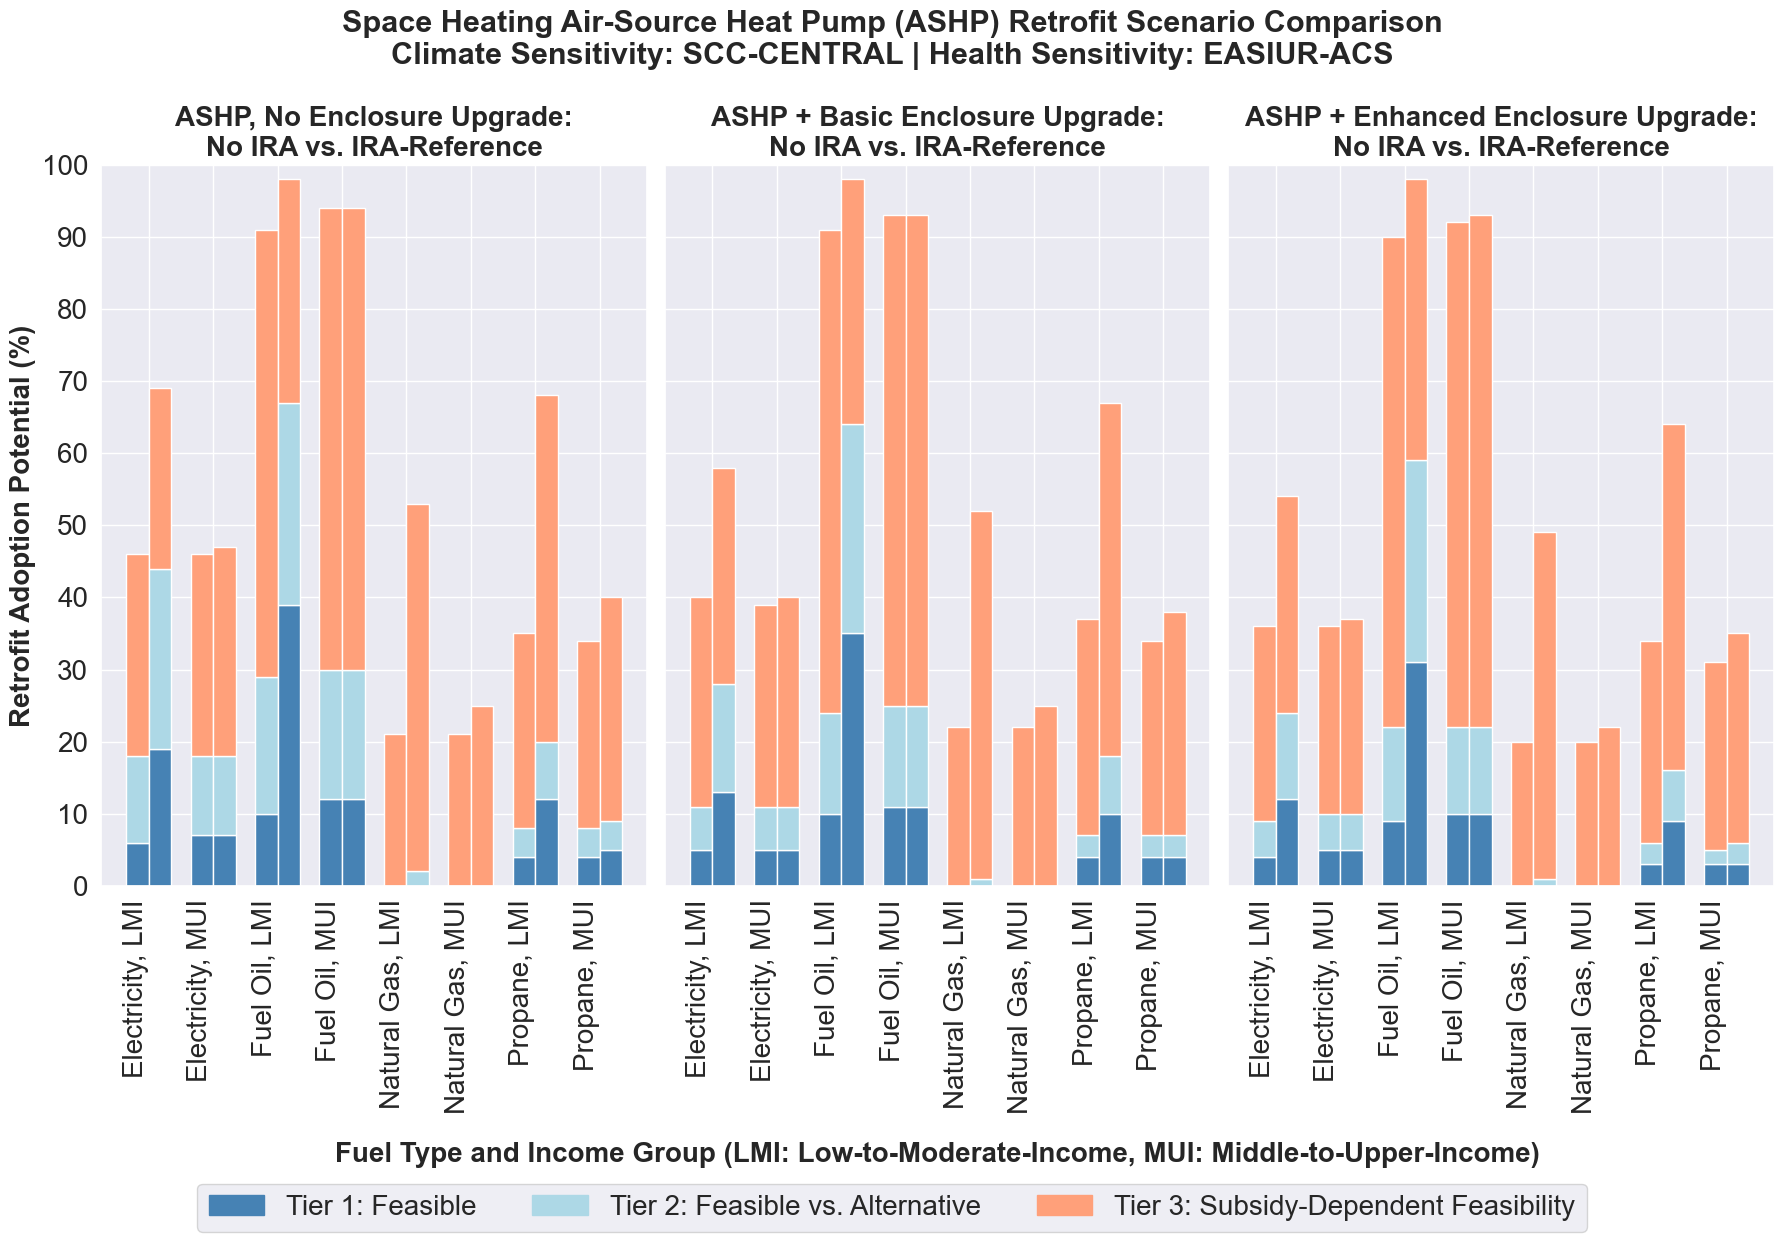

In [16]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, heating - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'easiur'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_all_HVAC_easiur_acs = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_heating_adoption_easiur_acs,
        df_mi_moderate_heating_adoption_easiur_acs, 
        df_mi_advanced_heating_adoption_easiur_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "ASHP, No Enclosure Upgrade:\nNo IRA vs. IRA-Reference", 
        "ASHP + Basic Enclosure Upgrade:\nNo IRA vs. IRA-Reference", 
        "ASHP + Enhanced Enclosure Upgrade:\nNo IRA vs. IRA-Reference"
        ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    suptitle=f"Space Heating Air-Source Heat Pump (ASHP) Retrofit Scenario Comparison\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_all_HVAC_easiur_acs

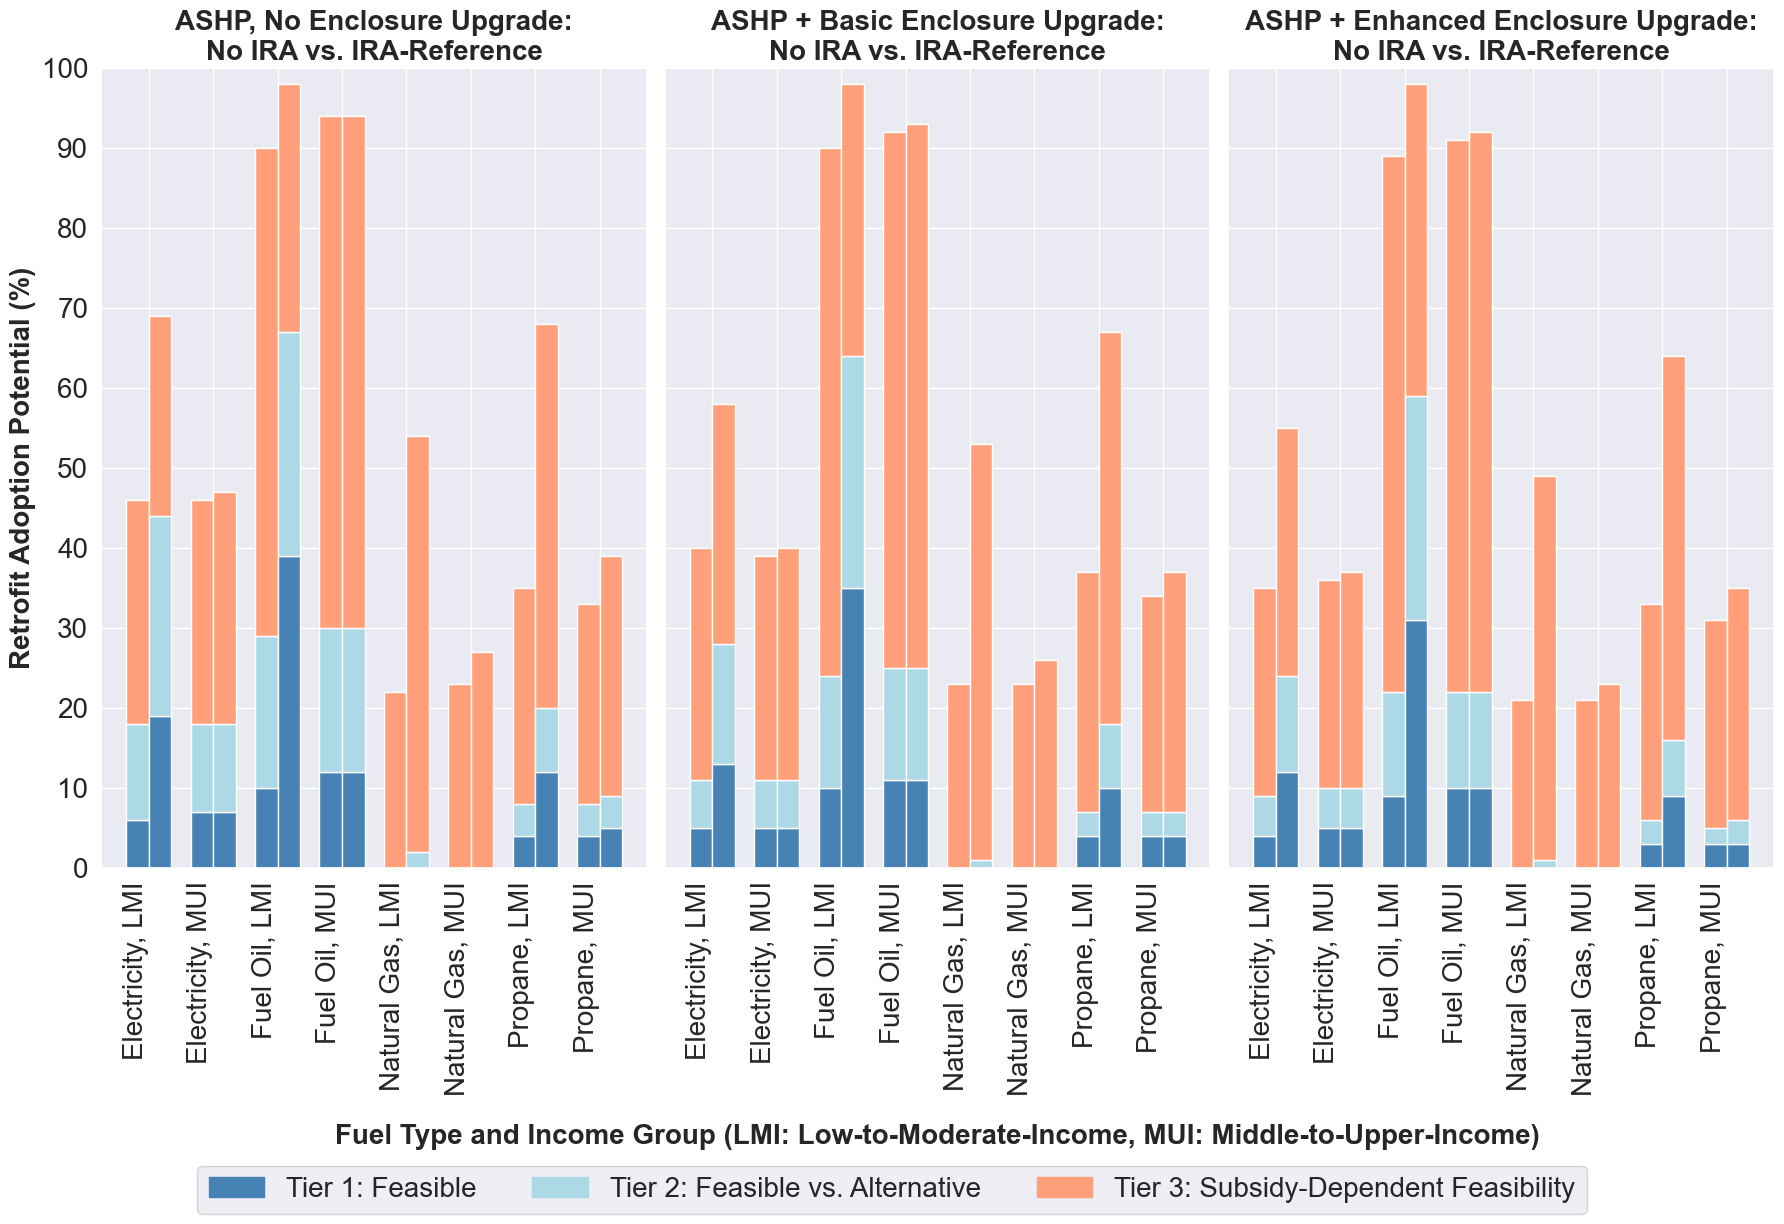

In [17]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, heating - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'inmap'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_all_HVAC_inmap_acs = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_heating_adoption_inmap_acs,
        df_mi_moderate_heating_adoption_inmap_acs, 
        df_mi_advanced_heating_adoption_inmap_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "ASHP, No Enclosure Upgrade:\nNo IRA vs. IRA-Reference", 
        "ASHP + Basic Enclosure Upgrade:\nNo IRA vs. IRA-Reference", 
        "ASHP + Enhanced Enclosure Upgrade:\nNo IRA vs. IRA-Reference"
        ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    # suptitle=f"Space Heating Air-Source Heat Pump (ASHP) Retrofit Scenario Comparison\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_all_HVAC_inmap_acs

## Water Heating, Clothes Drying, and Cooking - Basic Retrofit (MP8)

In [18]:
# =======================================================================================================
# BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
menu_mp=8
scc = 'central'

# ========================== BASIC-AP2 ========================== 
rcm_model = 'ap2'

print(f"""
=======================================================================================================
BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: ap2_acs, ap2_h6c
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...

""")
df_mi_basic_waterHeating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'waterHeating', scc, rcm_model, 'acs')
df_mi_basic_waterHeating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'waterHeating', scc, rcm_model, 'h6c')

df_mi_basic_clothesDrying_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'clothesDrying', scc, rcm_model, 'acs')
df_mi_basic_clothesDrying_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'clothesDrying', scc, rcm_model, 'h6c')

df_mi_basic_cooking_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'cooking', scc, rcm_model, 'acs')
df_mi_basic_cooking_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'cooking', scc, rcm_model, 'h6c')


# ========================== BASIC-EASIUR ========================== 
rcm_model = 'easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...

""")
df_mi_basic_waterHeating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'waterHeating', scc, rcm_model, 'acs')
df_mi_basic_waterHeating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'waterHeating', scc, rcm_model, 'h6c')

df_mi_basic_clothesDrying_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'clothesDrying', scc, rcm_model, 'acs')
df_mi_basic_clothesDrying_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'clothesDrying', scc, rcm_model, 'h6c')

df_mi_basic_cooking_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'cooking', scc, rcm_model, 'acs')
df_mi_basic_cooking_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'cooking', scc, rcm_model, 'h6c')


# ========================== BASIC-InMAP ========================== 
rcm_model = 'inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...

""")
df_mi_basic_waterHeating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'waterHeating', scc, rcm_model, 'acs')
df_mi_basic_waterHeating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'waterHeating', scc, rcm_model, 'h6c')

df_mi_basic_clothesDrying_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'clothesDrying', scc, rcm_model, 'acs')
df_mi_basic_clothesDrying_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'clothesDrying', scc, rcm_model, 'h6c')

df_mi_basic_cooking_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'cooking', scc, rcm_model, 'acs')
df_mi_basic_cooking_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'cooking', scc, rcm_model, 'h6c')



BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: ap2_acs, ap2_h6c
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM Model: ap2
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...



------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM Model: easiur
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...



------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIV

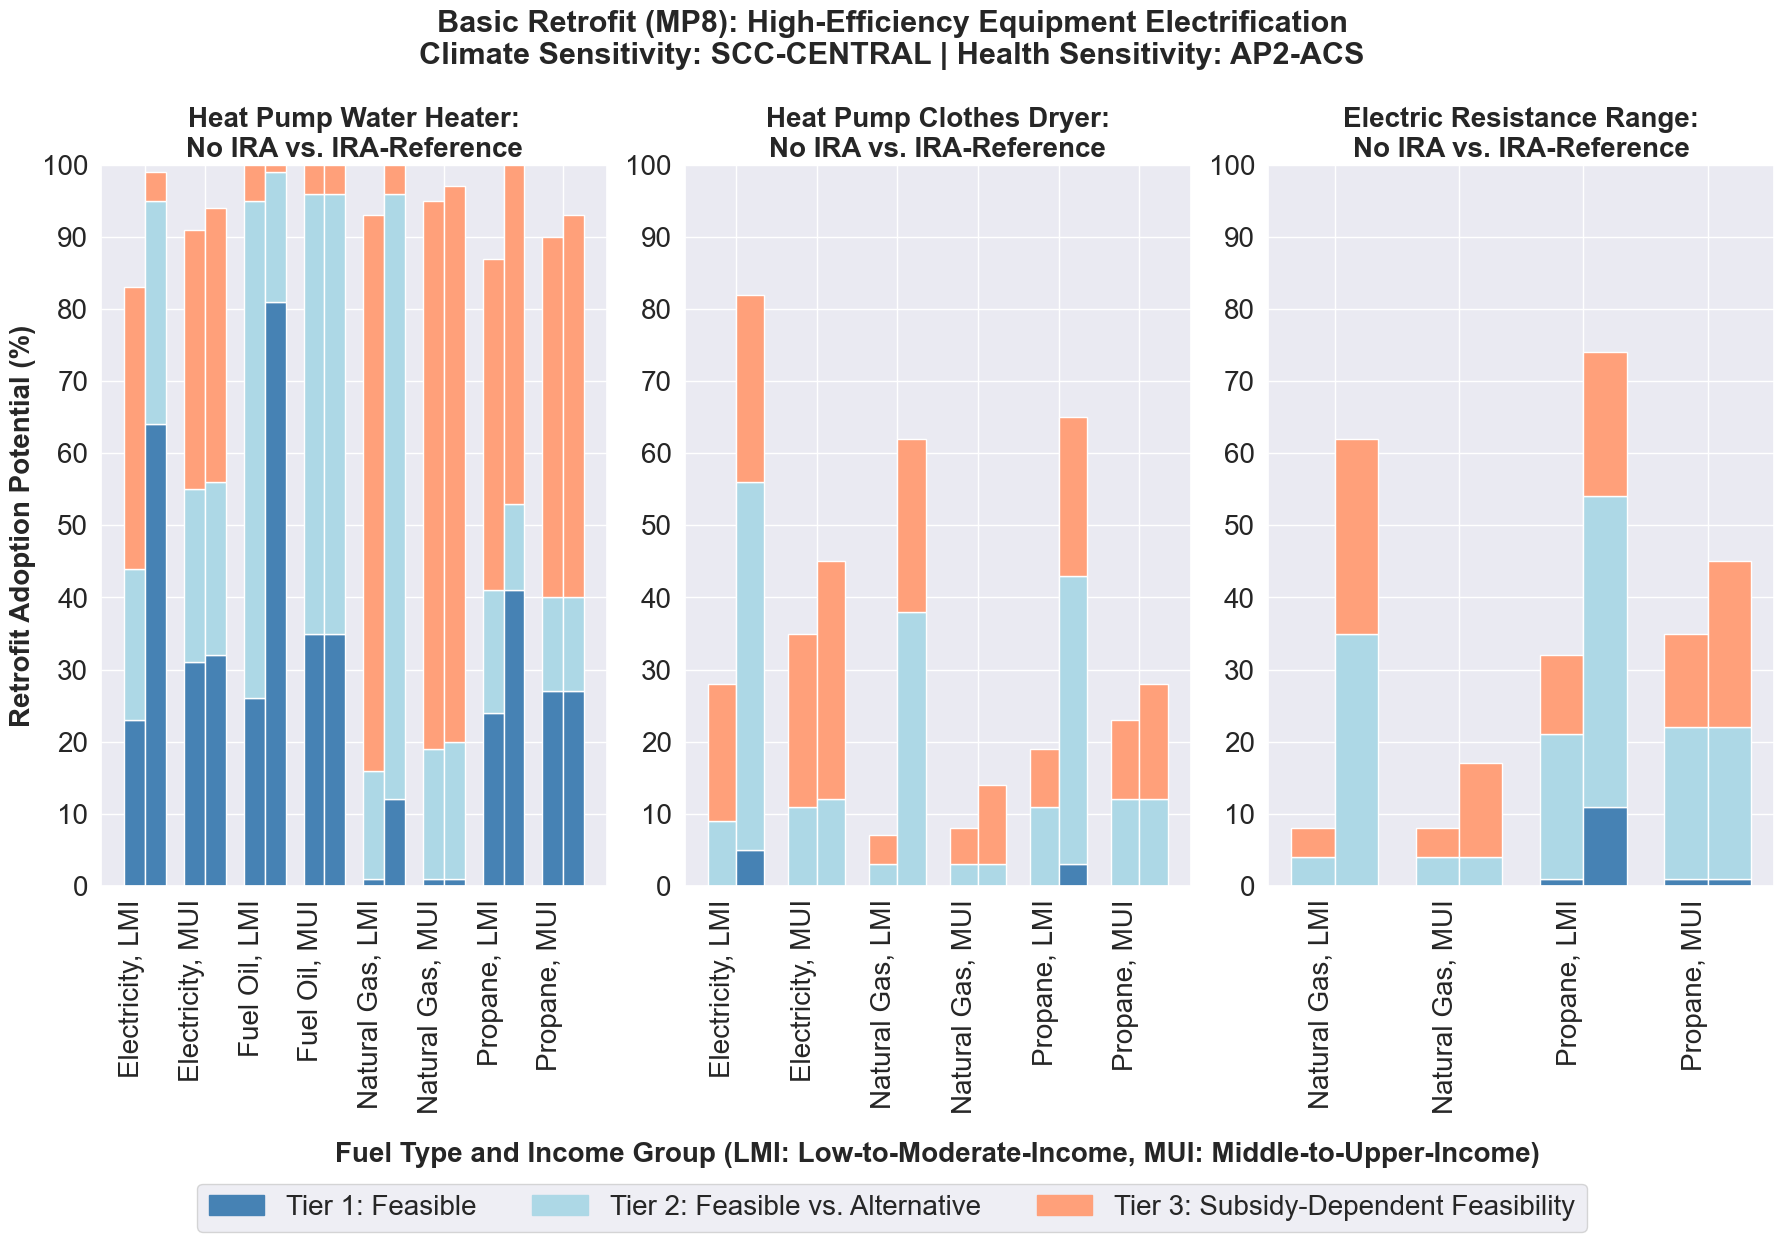

In [19]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, Cooking - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'ap2'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_mp8_nonHVAC_ap2_acs = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_waterHeating_adoption_ap2_acs,
        df_mi_basic_clothesDrying_adoption_ap2_acs, 
        df_mi_basic_cooking_adoption_ap2_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "Heat Pump Water Heater:\nNo IRA vs. IRA-Reference",
        "Heat Pump Clothes Dryer:\nNo IRA vs. IRA-Reference",
        "Electric Resistance Range:\nNo IRA vs. IRA-Reference"
    ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    suptitle=f"Basic Retrofit (MP8): High-Efficiency Equipment Electrification\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=False,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_mp8_nonHVAC_ap2_acs

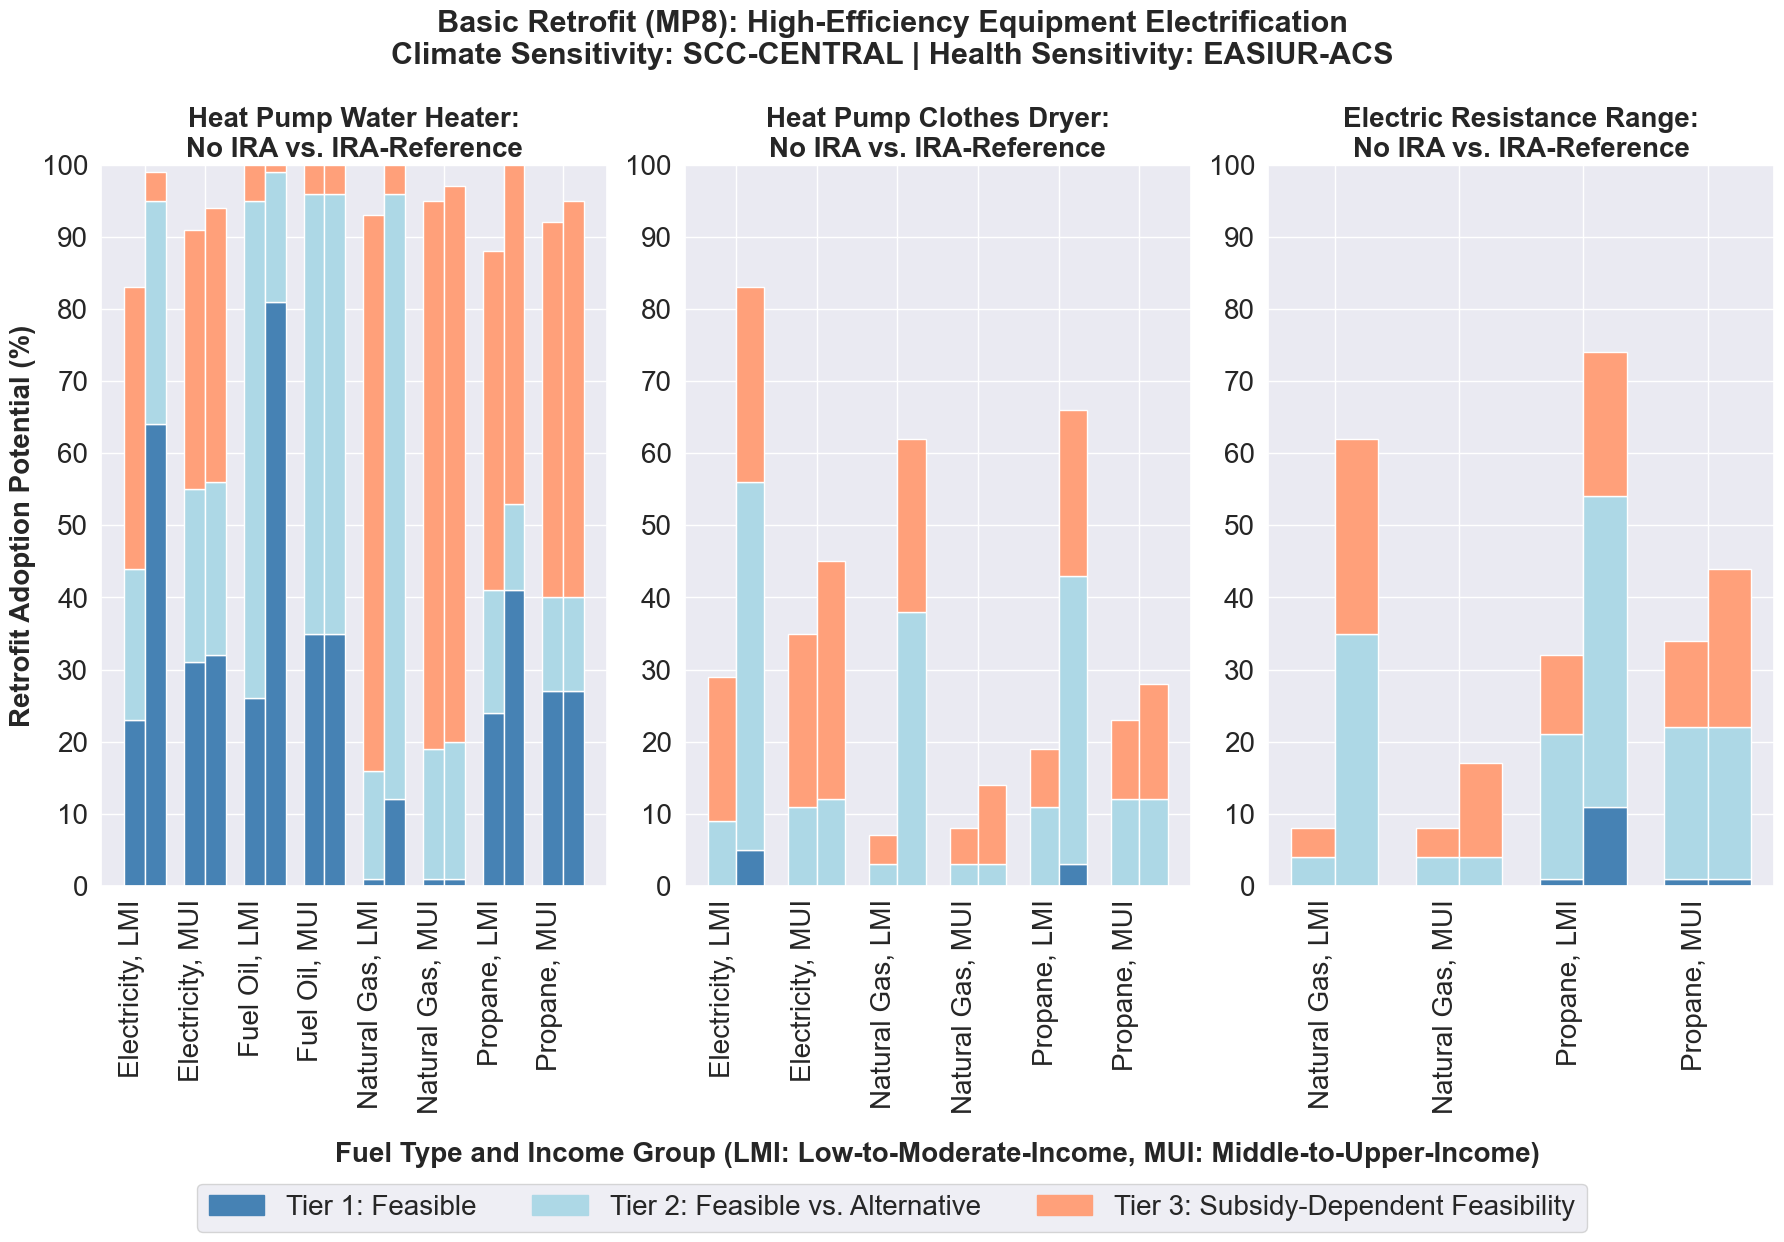

In [20]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, Cooking - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'easiur'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_mp8_nonHVAC_easiur_acs_fuelIncome = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_waterHeating_adoption_easiur_acs,
        df_mi_basic_clothesDrying_adoption_easiur_acs, 
        df_mi_basic_cooking_adoption_easiur_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "Heat Pump Water Heater:\nNo IRA vs. IRA-Reference",
        "Heat Pump Clothes Dryer:\nNo IRA vs. IRA-Reference",
        "Electric Resistance Range:\nNo IRA vs. IRA-Reference"
    ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    suptitle=f"Basic Retrofit (MP8): High-Efficiency Equipment Electrification\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=False,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_mp8_nonHVAC_easiur_acs_fuelIncome

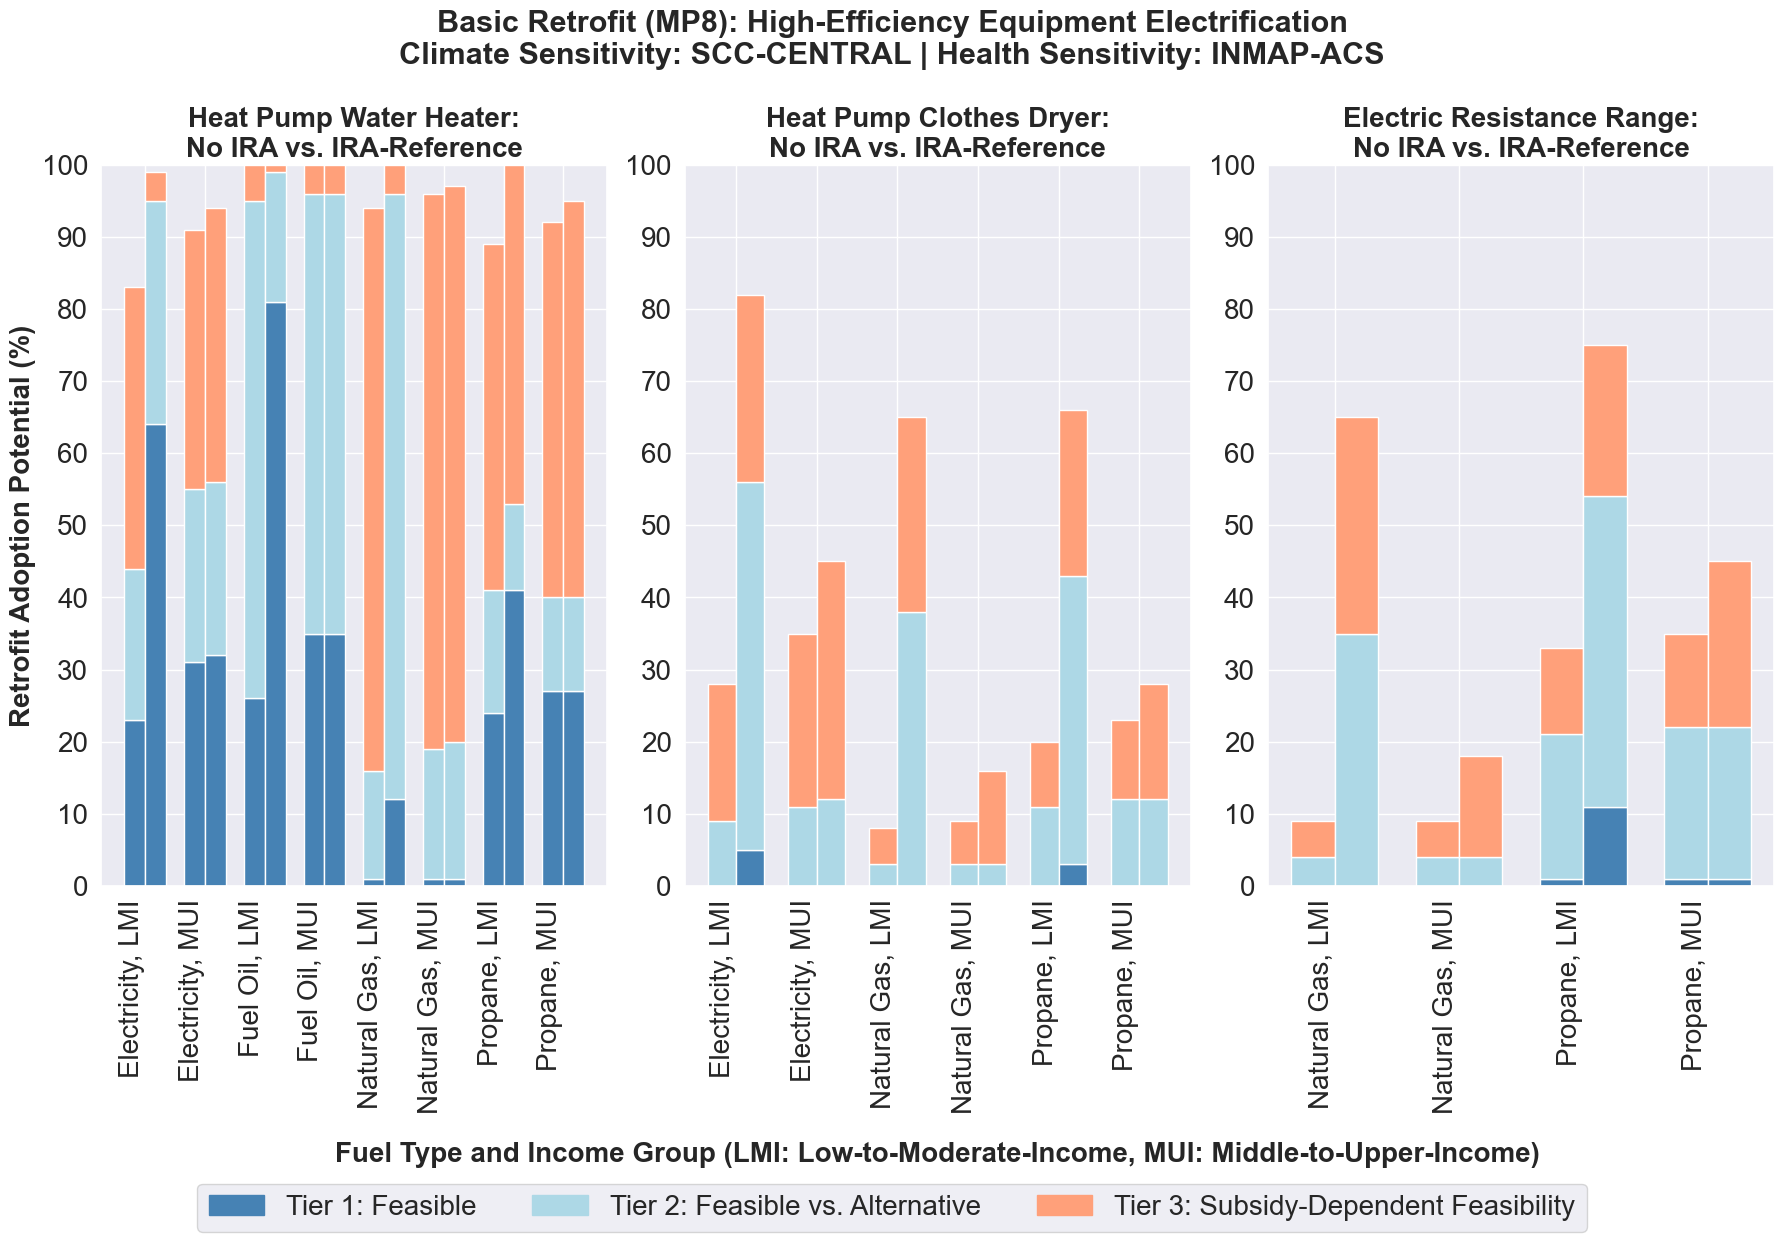

In [21]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, Cooking - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'inmap'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_mp8_nonHVAC_inmap_acs_fuelIncome = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_waterHeating_adoption_inmap_acs,
        df_mi_basic_clothesDrying_adoption_inmap_acs, 
        df_mi_basic_cooking_adoption_inmap_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "Heat Pump Water Heater:\nNo IRA vs. IRA-Reference",
        "Heat Pump Clothes Dryer:\nNo IRA vs. IRA-Reference",
        "Electric Resistance Range:\nNo IRA vs. IRA-Reference"
    ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    suptitle=f"Basic Retrofit (MP8): High-Efficiency Equipment Electrification\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=False,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_mp8_nonHVAC_inmap_acs_fuelIncome

# Model Runtime

In [22]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")

The code took 218 minutes and 17 seconds to execute.


# UNCERTAINTY ANALYSIS

In [23]:
from cmu_tare_model.utils.data_visualization import summarize_stats_table
from cmu_tare_model.utils.data_visualization_boxplots import create_subplot_grid_boxplot
from cmu_tare_model.utils.data_visualization_histograms import create_subplot_grid_histogram, print_positive_percentages_complete

print(f"""  
====================================================================================================================================================================
UNCERTAINTY ANALYSIS VISUALIZATION
====================================================================================================================================================================

--------------------------------------------------------
SUMMARY STATISTICS TABLE
--------------------------------------------------------
data_visualization.py file contains the definition for the summarize_stats_table function.
      
Documentation for the summarize_stats_table function:
{summarize_stats_table.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------
SUBPLOT GRID OF BOXPLOTS
--------------------------------------------------------
data_visualization_boxplots.py file contains the definition for the create_subplot_grid_boxplot function.
      
Documentation for the create_subplot_grid_boxplot function:
{create_subplot_grid_boxplot.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------
SUBPLOT GRID OF HISTOGRAMS
--------------------------------------------------------
data_visualization_histograms.py file contains the definition for the create_subplot_grid_histogram function.
      
Documentation for the create_subplot_grid_histogram function:
{create_subplot_grid_histogram.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
""")

  
UNCERTAINTY ANALYSIS VISUALIZATION

--------------------------------------------------------
SUMMARY STATISTICS TABLE
--------------------------------------------------------
data_visualization.py file contains the definition for the summarize_stats_table function.
      
Documentation for the summarize_stats_table function:

    Generate a formatted summary statistics table for specified columns in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame from which to compute statistics.
        data_columns (list[str]): The columns to include in the summary statistics.
        column_name_mapping (dict[str, str]): Mapping from original column names to desired display names.
        number_formatting (str): The Python format string (e.g. ".2f") to format numeric values in the output.
        include_zero (bool, optional): Whether to include zero values in the statistics. Defaults to True.
        category (str | None, optional): Category name for filtering fuel types 

## Climate Change Impact (SCC) and Tier 3 Adopters

### Varying SCC on Subsidy Dependent Feasibility Outcomes (with AP2-ACS)

### Varying SCC on Subsidy Dependent Feasibility Outcomes (with EASIUR-ACS)

KeyError: "Column 'iraRef_mp8_heating_total_npv_moreWTP_lower_ap2_acs' not found in DataFrame at index 0. Available columns: ['square_footage', 'census_region', 'census_division', 'census_division_recs', 'building_america_climate_zone', 'reeds_balancing_area', 'gea_region', 'state', 'city', 'county', 'county_fips', 'puma', 'county_and_puma', 'weather_file_city', 'Longitude', 'Latitude', 'building_type', 'income', 'federal_poverty_level', 'occupancy', 'tenure', 'vacancy_status', 'base_heating_fuel', 'heating_type', 'hvac_cooling_type', 'vintage', 'base_heating_efficiency', 'base_electricity_heating_consumption', 'base_fuelOil_heating_consumption', 'base_naturalGas_heating_consumption', 'base_propane_heating_consumption', 'base_waterHeating_fuel', 'waterHeating_type', 'base_electricity_waterHeating_consumption', 'base_fuelOil_waterHeating_consumption', 'base_naturalGas_waterHeating_consumption', 'base_propane_waterHeating_consumption', 'base_clothesDrying_fuel', 'base_electricity_clothesDrying_consumption', 'base_naturalGas_clothesDrying_consumption', 'base_propane_clothesDrying_consumption', 'base_cooking_fuel', 'base_electricity_cooking_consumption', 'base_naturalGas_cooking_consumption', 'base_propane_cooking_consumption', 'baseline_heating_consumption', 'baseline_waterHeating_consumption', 'baseline_clothesDrying_consumption', 'baseline_cooking_consumption', 'include_all', 'valid_fuel_heating', 'valid_tech_heating', 'include_heating', 'valid_fuel_waterHeating', 'valid_tech_waterHeating', 'include_waterHeating', 'valid_fuel_clothesDrying', 'include_clothesDrying', 'valid_fuel_cooking', 'include_cooking', 'baseline_2024_heating_consumption', 'baseline_2025_heating_consumption', 'baseline_2026_heating_consumption', 'baseline_2027_heating_consumption', 'baseline_2028_heating_consumption', 'baseline_2029_heating_consumption', 'baseline_2030_heating_consumption', 'baseline_2031_heating_consumption', 'baseline_2032_heating_consumption', 'baseline_2033_heating_consumption', 'baseline_2034_heating_consumption', 'baseline_2035_heating_consumption', 'baseline_2036_heating_consumption', 'baseline_2037_heating_consumption', 'baseline_2038_heating_consumption', 'baseline_2024_waterHeating_consumption', 'baseline_2025_waterHeating_consumption', 'baseline_2026_waterHeating_consumption', 'baseline_2027_waterHeating_consumption', 'baseline_2028_waterHeating_consumption', 'baseline_2029_waterHeating_consumption', 'baseline_2030_waterHeating_consumption', 'baseline_2031_waterHeating_consumption', 'baseline_2032_waterHeating_consumption', 'baseline_2033_waterHeating_consumption', 'baseline_2034_waterHeating_consumption', 'baseline_2035_waterHeating_consumption', 'baseline_2024_clothesDrying_consumption', 'baseline_2025_clothesDrying_consumption', 'baseline_2026_clothesDrying_consumption', 'baseline_2027_clothesDrying_consumption', 'baseline_2028_clothesDrying_consumption', 'baseline_2029_clothesDrying_consumption', 'baseline_2030_clothesDrying_consumption', 'baseline_2031_clothesDrying_consumption', 'baseline_2032_clothesDrying_consumption', 'baseline_2033_clothesDrying_consumption', 'baseline_2034_clothesDrying_consumption', 'baseline_2035_clothesDrying_consumption', 'baseline_2036_clothesDrying_consumption', 'baseline_2024_cooking_consumption', 'baseline_2025_cooking_consumption', 'baseline_2026_cooking_consumption', 'baseline_2027_cooking_consumption', 'baseline_2028_cooking_consumption', 'baseline_2029_cooking_consumption', 'baseline_2030_cooking_consumption', 'baseline_2031_cooking_consumption', 'baseline_2032_cooking_consumption', 'baseline_2033_cooking_consumption', 'baseline_2034_cooking_consumption', 'baseline_2035_cooking_consumption', 'baseline_2036_cooking_consumption', 'baseline_2037_cooking_consumption', 'baseline_2038_cooking_consumption', 'baseline_heating_lifetime_mt_co2e_lrmer', 'baseline_heating_lifetime_damages_climate_lrmer_lower', 'baseline_heating_lifetime_damages_climate_lrmer_central', 'baseline_heating_lifetime_damages_climate_lrmer_upper', 'baseline_heating_lifetime_mt_co2e_srmer', 'baseline_heating_lifetime_damages_climate_srmer_lower', 'baseline_heating_lifetime_damages_climate_srmer_central', 'baseline_heating_lifetime_damages_climate_srmer_upper', 'baseline_waterHeating_lifetime_mt_co2e_lrmer', 'baseline_waterHeating_lifetime_damages_climate_lrmer_lower', 'baseline_waterHeating_lifetime_damages_climate_lrmer_central', 'baseline_waterHeating_lifetime_damages_climate_lrmer_upper', 'baseline_waterHeating_lifetime_mt_co2e_srmer', 'baseline_waterHeating_lifetime_damages_climate_srmer_lower', 'baseline_waterHeating_lifetime_damages_climate_srmer_central', 'baseline_waterHeating_lifetime_damages_climate_srmer_upper', 'baseline_clothesDrying_lifetime_mt_co2e_lrmer', 'baseline_clothesDrying_lifetime_damages_climate_lrmer_lower', 'baseline_clothesDrying_lifetime_damages_climate_lrmer_central', 'baseline_clothesDrying_lifetime_damages_climate_lrmer_upper', 'baseline_clothesDrying_lifetime_mt_co2e_srmer', 'baseline_clothesDrying_lifetime_damages_climate_srmer_lower', 'baseline_clothesDrying_lifetime_damages_climate_srmer_central', 'baseline_clothesDrying_lifetime_damages_climate_srmer_upper', 'baseline_cooking_lifetime_mt_co2e_lrmer', 'baseline_cooking_lifetime_damages_climate_lrmer_lower', 'baseline_cooking_lifetime_damages_climate_lrmer_central', 'baseline_cooking_lifetime_damages_climate_lrmer_upper', 'baseline_cooking_lifetime_mt_co2e_srmer', 'baseline_cooking_lifetime_damages_climate_srmer_lower', 'baseline_cooking_lifetime_damages_climate_srmer_central', 'baseline_cooking_lifetime_damages_climate_srmer_upper', 'county_key', 'baseline_heating_lifetime_damages_health_ap2_acs', 'baseline_heating_lifetime_damages_health_ap2_h6c', 'baseline_heating_lifetime_damages_health_easiur_acs', 'baseline_heating_lifetime_damages_health_easiur_h6c', 'baseline_heating_lifetime_damages_health_inmap_acs', 'baseline_heating_lifetime_damages_health_inmap_h6c', 'baseline_waterHeating_lifetime_damages_health_ap2_acs', 'baseline_waterHeating_lifetime_damages_health_ap2_h6c', 'baseline_waterHeating_lifetime_damages_health_easiur_acs', 'baseline_waterHeating_lifetime_damages_health_easiur_h6c', 'baseline_waterHeating_lifetime_damages_health_inmap_acs', 'baseline_waterHeating_lifetime_damages_health_inmap_h6c', 'baseline_clothesDrying_lifetime_damages_health_ap2_acs', 'baseline_clothesDrying_lifetime_damages_health_ap2_h6c', 'baseline_clothesDrying_lifetime_damages_health_easiur_acs', 'baseline_clothesDrying_lifetime_damages_health_easiur_h6c', 'baseline_clothesDrying_lifetime_damages_health_inmap_acs', 'baseline_clothesDrying_lifetime_damages_health_inmap_h6c', 'baseline_cooking_lifetime_damages_health_ap2_acs', 'baseline_cooking_lifetime_damages_health_ap2_h6c', 'baseline_cooking_lifetime_damages_health_easiur_acs', 'baseline_cooking_lifetime_damages_health_easiur_h6c', 'baseline_cooking_lifetime_damages_health_inmap_acs', 'baseline_cooking_lifetime_damages_health_inmap_h6c', 'fuel_type_heating', 'fuel_type_waterHeating', 'fuel_type_clothesDrying', 'fuel_type_cooking', 'hvac_has_ducts', 'baseline_heating_type', 'hvac_heating_efficiency', 'hvac_heating_type_and_fuel', 'size_heat_pump_backup_primary_k_btu_h', 'size_heating_system_primary_k_btu_h', 'size_heating_system_secondary_k_btu_h', 'upgrade_hvac_heating_efficiency', 'water_heater_efficiency', 'water_heater_fuel', 'water_heater_in_unit', 'size_water_heater_gal', 'upgrade_water_heater_efficiency', 'clothes_dryer_in_unit', 'upgrade_clothes_dryer', 'cooking_range_in_unit', 'upgrade_cooking_range', 'mp8_heating_consumption', 'mp8_waterHeating_consumption', 'mp8_clothesDrying_consumption', 'mp8_cooking_consumption', 'preIRA_mp8_heating_lifetime_mt_co2e_lrmer', 'preIRA_mp8_heating_lifetime_damages_climate_lrmer_lower', 'preIRA_mp8_heating_avoided_damages_climate_lrmer_lower', 'preIRA_mp8_heating_lifetime_damages_climate_lrmer_central', 'preIRA_mp8_heating_avoided_damages_climate_lrmer_central', 'preIRA_mp8_heating_lifetime_damages_climate_lrmer_upper', 'preIRA_mp8_heating_avoided_damages_climate_lrmer_upper', 'preIRA_mp8_heating_avoided_mt_co2e_lrmer', 'preIRA_mp8_heating_lifetime_mt_co2e_srmer', 'preIRA_mp8_heating_lifetime_damages_climate_srmer_lower', 'preIRA_mp8_heating_avoided_damages_climate_srmer_lower', 'preIRA_mp8_heating_lifetime_damages_climate_srmer_central', 'preIRA_mp8_heating_avoided_damages_climate_srmer_central', 'preIRA_mp8_heating_lifetime_damages_climate_srmer_upper', 'preIRA_mp8_heating_avoided_damages_climate_srmer_upper', 'preIRA_mp8_heating_avoided_mt_co2e_srmer', 'preIRA_mp8_waterHeating_lifetime_mt_co2e_lrmer', 'preIRA_mp8_waterHeating_lifetime_damages_climate_lrmer_lower', 'preIRA_mp8_waterHeating_avoided_damages_climate_lrmer_lower', 'preIRA_mp8_waterHeating_lifetime_damages_climate_lrmer_central', 'preIRA_mp8_waterHeating_avoided_damages_climate_lrmer_central', 'preIRA_mp8_waterHeating_lifetime_damages_climate_lrmer_upper', 'preIRA_mp8_waterHeating_avoided_damages_climate_lrmer_upper', 'preIRA_mp8_waterHeating_avoided_mt_co2e_lrmer', 'preIRA_mp8_waterHeating_lifetime_mt_co2e_srmer', 'preIRA_mp8_waterHeating_lifetime_damages_climate_srmer_lower', 'preIRA_mp8_waterHeating_avoided_damages_climate_srmer_lower', 'preIRA_mp8_waterHeating_lifetime_damages_climate_srmer_central', 'preIRA_mp8_waterHeating_avoided_damages_climate_srmer_central', 'preIRA_mp8_waterHeating_lifetime_damages_climate_srmer_upper', 'preIRA_mp8_waterHeating_avoided_damages_climate_srmer_upper', 'preIRA_mp8_waterHeating_avoided_mt_co2e_srmer', 'preIRA_mp8_clothesDrying_lifetime_mt_co2e_lrmer', 'preIRA_mp8_clothesDrying_lifetime_damages_climate_lrmer_lower', 'preIRA_mp8_clothesDrying_avoided_damages_climate_lrmer_lower', 'preIRA_mp8_clothesDrying_lifetime_damages_climate_lrmer_central', 'preIRA_mp8_clothesDrying_avoided_damages_climate_lrmer_central', 'preIRA_mp8_clothesDrying_lifetime_damages_climate_lrmer_upper', 'preIRA_mp8_clothesDrying_avoided_damages_climate_lrmer_upper', 'preIRA_mp8_clothesDrying_avoided_mt_co2e_lrmer', 'preIRA_mp8_clothesDrying_lifetime_mt_co2e_srmer', 'preIRA_mp8_clothesDrying_lifetime_damages_climate_srmer_lower', 'preIRA_mp8_clothesDrying_avoided_damages_climate_srmer_lower', 'preIRA_mp8_clothesDrying_lifetime_damages_climate_srmer_central', 'preIRA_mp8_clothesDrying_avoided_damages_climate_srmer_central', 'preIRA_mp8_clothesDrying_lifetime_damages_climate_srmer_upper', 'preIRA_mp8_clothesDrying_avoided_damages_climate_srmer_upper', 'preIRA_mp8_clothesDrying_avoided_mt_co2e_srmer', 'preIRA_mp8_cooking_lifetime_mt_co2e_lrmer', 'preIRA_mp8_cooking_lifetime_damages_climate_lrmer_lower', 'preIRA_mp8_cooking_avoided_damages_climate_lrmer_lower', 'preIRA_mp8_cooking_lifetime_damages_climate_lrmer_central', 'preIRA_mp8_cooking_avoided_damages_climate_lrmer_central', 'preIRA_mp8_cooking_lifetime_damages_climate_lrmer_upper', 'preIRA_mp8_cooking_avoided_damages_climate_lrmer_upper', 'preIRA_mp8_cooking_avoided_mt_co2e_lrmer', 'preIRA_mp8_cooking_lifetime_mt_co2e_srmer', 'preIRA_mp8_cooking_lifetime_damages_climate_srmer_lower', 'preIRA_mp8_cooking_avoided_damages_climate_srmer_lower', 'preIRA_mp8_cooking_lifetime_damages_climate_srmer_central', 'preIRA_mp8_cooking_avoided_damages_climate_srmer_central', 'preIRA_mp8_cooking_lifetime_damages_climate_srmer_upper', 'preIRA_mp8_cooking_avoided_damages_climate_srmer_upper', 'preIRA_mp8_cooking_avoided_mt_co2e_srmer', 'preIRA_mp8_heating_lifetime_damages_health_ap2_acs', 'preIRA_mp8_heating_avoided_damages_health_ap2_acs', 'preIRA_mp8_heating_lifetime_damages_health_ap2_h6c', 'preIRA_mp8_heating_avoided_damages_health_ap2_h6c', 'preIRA_mp8_heating_lifetime_damages_health_easiur_acs', 'preIRA_mp8_heating_avoided_damages_health_easiur_acs', 'preIRA_mp8_heating_lifetime_damages_health_easiur_h6c', 'preIRA_mp8_heating_avoided_damages_health_easiur_h6c', 'preIRA_mp8_heating_lifetime_damages_health_inmap_acs', 'preIRA_mp8_heating_avoided_damages_health_inmap_acs', 'preIRA_mp8_heating_lifetime_damages_health_inmap_h6c', 'preIRA_mp8_heating_avoided_damages_health_inmap_h6c', 'preIRA_mp8_waterHeating_lifetime_damages_health_ap2_acs', 'preIRA_mp8_waterHeating_avoided_damages_health_ap2_acs', 'preIRA_mp8_waterHeating_lifetime_damages_health_ap2_h6c', 'preIRA_mp8_waterHeating_avoided_damages_health_ap2_h6c', 'preIRA_mp8_waterHeating_lifetime_damages_health_easiur_acs', 'preIRA_mp8_waterHeating_avoided_damages_health_easiur_acs', 'preIRA_mp8_waterHeating_lifetime_damages_health_easiur_h6c', 'preIRA_mp8_waterHeating_avoided_damages_health_easiur_h6c', 'preIRA_mp8_waterHeating_lifetime_damages_health_inmap_acs', 'preIRA_mp8_waterHeating_avoided_damages_health_inmap_acs', 'preIRA_mp8_waterHeating_lifetime_damages_health_inmap_h6c', 'preIRA_mp8_waterHeating_avoided_damages_health_inmap_h6c', 'preIRA_mp8_clothesDrying_lifetime_damages_health_ap2_acs', 'preIRA_mp8_clothesDrying_avoided_damages_health_ap2_acs', 'preIRA_mp8_clothesDrying_lifetime_damages_health_ap2_h6c', 'preIRA_mp8_clothesDrying_avoided_damages_health_ap2_h6c', 'preIRA_mp8_clothesDrying_lifetime_damages_health_easiur_acs', 'preIRA_mp8_clothesDrying_avoided_damages_health_easiur_acs', 'preIRA_mp8_clothesDrying_lifetime_damages_health_easiur_h6c', 'preIRA_mp8_clothesDrying_avoided_damages_health_easiur_h6c', 'preIRA_mp8_clothesDrying_lifetime_damages_health_inmap_acs', 'preIRA_mp8_clothesDrying_avoided_damages_health_inmap_acs', 'preIRA_mp8_clothesDrying_lifetime_damages_health_inmap_h6c', 'preIRA_mp8_clothesDrying_avoided_damages_health_inmap_h6c', 'preIRA_mp8_cooking_lifetime_damages_health_ap2_acs', 'preIRA_mp8_cooking_avoided_damages_health_ap2_acs', 'preIRA_mp8_cooking_lifetime_damages_health_ap2_h6c', 'preIRA_mp8_cooking_avoided_damages_health_ap2_h6c', 'preIRA_mp8_cooking_lifetime_damages_health_easiur_acs', 'preIRA_mp8_cooking_avoided_damages_health_easiur_acs', 'preIRA_mp8_cooking_lifetime_damages_health_easiur_h6c', 'preIRA_mp8_cooking_avoided_damages_health_easiur_h6c', 'preIRA_mp8_cooking_lifetime_damages_health_inmap_acs', 'preIRA_mp8_cooking_avoided_damages_health_inmap_acs', 'preIRA_mp8_cooking_lifetime_damages_health_inmap_h6c', 'preIRA_mp8_cooking_avoided_damages_health_inmap_h6c', 'iraRef_mp8_heating_lifetime_mt_co2e_lrmer', 'iraRef_mp8_heating_lifetime_damages_climate_lrmer_lower', 'iraRef_mp8_heating_avoided_damages_climate_lrmer_lower', 'iraRef_mp8_heating_lifetime_damages_climate_lrmer_central', 'iraRef_mp8_heating_avoided_damages_climate_lrmer_central', 'iraRef_mp8_heating_lifetime_damages_climate_lrmer_upper', 'iraRef_mp8_heating_avoided_damages_climate_lrmer_upper', 'iraRef_mp8_heating_avoided_mt_co2e_lrmer', 'iraRef_mp8_heating_lifetime_mt_co2e_srmer', 'iraRef_mp8_heating_lifetime_damages_climate_srmer_lower', 'iraRef_mp8_heating_avoided_damages_climate_srmer_lower', 'iraRef_mp8_heating_lifetime_damages_climate_srmer_central', 'iraRef_mp8_heating_avoided_damages_climate_srmer_central', 'iraRef_mp8_heating_lifetime_damages_climate_srmer_upper', 'iraRef_mp8_heating_avoided_damages_climate_srmer_upper', 'iraRef_mp8_heating_avoided_mt_co2e_srmer', 'iraRef_mp8_waterHeating_lifetime_mt_co2e_lrmer', 'iraRef_mp8_waterHeating_lifetime_damages_climate_lrmer_lower', 'iraRef_mp8_waterHeating_avoided_damages_climate_lrmer_lower', 'iraRef_mp8_waterHeating_lifetime_damages_climate_lrmer_central', 'iraRef_mp8_waterHeating_avoided_damages_climate_lrmer_central', 'iraRef_mp8_waterHeating_lifetime_damages_climate_lrmer_upper', 'iraRef_mp8_waterHeating_avoided_damages_climate_lrmer_upper', 'iraRef_mp8_waterHeating_avoided_mt_co2e_lrmer', 'iraRef_mp8_waterHeating_lifetime_mt_co2e_srmer', 'iraRef_mp8_waterHeating_lifetime_damages_climate_srmer_lower', 'iraRef_mp8_waterHeating_avoided_damages_climate_srmer_lower', 'iraRef_mp8_waterHeating_lifetime_damages_climate_srmer_central', 'iraRef_mp8_waterHeating_avoided_damages_climate_srmer_central', 'iraRef_mp8_waterHeating_lifetime_damages_climate_srmer_upper', 'iraRef_mp8_waterHeating_avoided_damages_climate_srmer_upper', 'iraRef_mp8_waterHeating_avoided_mt_co2e_srmer', 'iraRef_mp8_clothesDrying_lifetime_mt_co2e_lrmer', 'iraRef_mp8_clothesDrying_lifetime_damages_climate_lrmer_lower', 'iraRef_mp8_clothesDrying_avoided_damages_climate_lrmer_lower', 'iraRef_mp8_clothesDrying_lifetime_damages_climate_lrmer_central', 'iraRef_mp8_clothesDrying_avoided_damages_climate_lrmer_central', 'iraRef_mp8_clothesDrying_lifetime_damages_climate_lrmer_upper', 'iraRef_mp8_clothesDrying_avoided_damages_climate_lrmer_upper', 'iraRef_mp8_clothesDrying_avoided_mt_co2e_lrmer', 'iraRef_mp8_clothesDrying_lifetime_mt_co2e_srmer', 'iraRef_mp8_clothesDrying_lifetime_damages_climate_srmer_lower', 'iraRef_mp8_clothesDrying_avoided_damages_climate_srmer_lower', 'iraRef_mp8_clothesDrying_lifetime_damages_climate_srmer_central', 'iraRef_mp8_clothesDrying_avoided_damages_climate_srmer_central', 'iraRef_mp8_clothesDrying_lifetime_damages_climate_srmer_upper', 'iraRef_mp8_clothesDrying_avoided_damages_climate_srmer_upper', 'iraRef_mp8_clothesDrying_avoided_mt_co2e_srmer', 'iraRef_mp8_cooking_lifetime_mt_co2e_lrmer', 'iraRef_mp8_cooking_lifetime_damages_climate_lrmer_lower', 'iraRef_mp8_cooking_avoided_damages_climate_lrmer_lower', 'iraRef_mp8_cooking_lifetime_damages_climate_lrmer_central', 'iraRef_mp8_cooking_avoided_damages_climate_lrmer_central', 'iraRef_mp8_cooking_lifetime_damages_climate_lrmer_upper', 'iraRef_mp8_cooking_avoided_damages_climate_lrmer_upper', 'iraRef_mp8_cooking_avoided_mt_co2e_lrmer', 'iraRef_mp8_cooking_lifetime_mt_co2e_srmer', 'iraRef_mp8_cooking_lifetime_damages_climate_srmer_lower', 'iraRef_mp8_cooking_avoided_damages_climate_srmer_lower', 'iraRef_mp8_cooking_lifetime_damages_climate_srmer_central', 'iraRef_mp8_cooking_avoided_damages_climate_srmer_central', 'iraRef_mp8_cooking_lifetime_damages_climate_srmer_upper', 'iraRef_mp8_cooking_avoided_damages_climate_srmer_upper', 'iraRef_mp8_cooking_avoided_mt_co2e_srmer', 'iraRef_mp8_heating_lifetime_damages_health_ap2_acs', 'iraRef_mp8_heating_avoided_damages_health_ap2_acs', 'iraRef_mp8_heating_lifetime_damages_health_ap2_h6c', 'iraRef_mp8_heating_avoided_damages_health_ap2_h6c', 'iraRef_mp8_heating_lifetime_damages_health_easiur_acs', 'iraRef_mp8_heating_avoided_damages_health_easiur_acs', 'iraRef_mp8_heating_lifetime_damages_health_easiur_h6c', 'iraRef_mp8_heating_avoided_damages_health_easiur_h6c', 'iraRef_mp8_heating_lifetime_damages_health_inmap_acs', 'iraRef_mp8_heating_avoided_damages_health_inmap_acs', 'iraRef_mp8_heating_lifetime_damages_health_inmap_h6c', 'iraRef_mp8_heating_avoided_damages_health_inmap_h6c', 'iraRef_mp8_waterHeating_lifetime_damages_health_ap2_acs', 'iraRef_mp8_waterHeating_avoided_damages_health_ap2_acs', 'iraRef_mp8_waterHeating_lifetime_damages_health_ap2_h6c', 'iraRef_mp8_waterHeating_avoided_damages_health_ap2_h6c', 'iraRef_mp8_waterHeating_lifetime_damages_health_easiur_acs', 'iraRef_mp8_waterHeating_avoided_damages_health_easiur_acs', 'iraRef_mp8_waterHeating_lifetime_damages_health_easiur_h6c', 'iraRef_mp8_waterHeating_avoided_damages_health_easiur_h6c', 'iraRef_mp8_waterHeating_lifetime_damages_health_inmap_acs', 'iraRef_mp8_waterHeating_avoided_damages_health_inmap_acs', 'iraRef_mp8_waterHeating_lifetime_damages_health_inmap_h6c', 'iraRef_mp8_waterHeating_avoided_damages_health_inmap_h6c', 'iraRef_mp8_clothesDrying_lifetime_damages_health_ap2_acs', 'iraRef_mp8_clothesDrying_avoided_damages_health_ap2_acs', 'iraRef_mp8_clothesDrying_lifetime_damages_health_ap2_h6c', 'iraRef_mp8_clothesDrying_avoided_damages_health_ap2_h6c', 'iraRef_mp8_clothesDrying_lifetime_damages_health_easiur_acs', 'iraRef_mp8_clothesDrying_avoided_damages_health_easiur_acs', 'iraRef_mp8_clothesDrying_lifetime_damages_health_easiur_h6c', 'iraRef_mp8_clothesDrying_avoided_damages_health_easiur_h6c', 'iraRef_mp8_clothesDrying_lifetime_damages_health_inmap_acs', 'iraRef_mp8_clothesDrying_avoided_damages_health_inmap_acs', 'iraRef_mp8_clothesDrying_lifetime_damages_health_inmap_h6c', 'iraRef_mp8_clothesDrying_avoided_damages_health_inmap_h6c', 'iraRef_mp8_cooking_lifetime_damages_health_ap2_acs', 'iraRef_mp8_cooking_avoided_damages_health_ap2_acs', 'iraRef_mp8_cooking_lifetime_damages_health_ap2_h6c', 'iraRef_mp8_cooking_avoided_damages_health_ap2_h6c', 'iraRef_mp8_cooking_lifetime_damages_health_easiur_acs', 'iraRef_mp8_cooking_avoided_damages_health_easiur_acs', 'iraRef_mp8_cooking_lifetime_damages_health_easiur_h6c', 'iraRef_mp8_cooking_avoided_damages_health_easiur_h6c', 'iraRef_mp8_cooking_lifetime_damages_health_inmap_acs', 'iraRef_mp8_cooking_avoided_damages_health_inmap_acs', 'iraRef_mp8_cooking_lifetime_damages_health_inmap_h6c', 'iraRef_mp8_cooking_avoided_damages_health_inmap_h6c', 'preIRA_mp8_heating_lifetime_fuel_cost', 'preIRA_mp8_heating_lifetime_savings_fuel_cost', 'preIRA_mp8_waterHeating_lifetime_fuel_cost', 'preIRA_mp8_waterHeating_lifetime_savings_fuel_cost', 'preIRA_mp8_clothesDrying_lifetime_fuel_cost', 'preIRA_mp8_clothesDrying_lifetime_savings_fuel_cost', 'preIRA_mp8_cooking_lifetime_fuel_cost', 'preIRA_mp8_cooking_lifetime_savings_fuel_cost', 'iraRef_mp8_heating_lifetime_fuel_cost', 'iraRef_mp8_heating_lifetime_savings_fuel_cost', 'baseline_heating_lifetime_fuel_cost', 'iraRef_mp8_waterHeating_lifetime_fuel_cost', 'iraRef_mp8_waterHeating_lifetime_savings_fuel_cost', 'baseline_waterHeating_lifetime_fuel_cost', 'iraRef_mp8_clothesDrying_lifetime_fuel_cost', 'iraRef_mp8_clothesDrying_lifetime_savings_fuel_cost', 'baseline_clothesDrying_lifetime_fuel_cost', 'iraRef_mp8_cooking_lifetime_fuel_cost', 'iraRef_mp8_cooking_lifetime_savings_fuel_cost', 'baseline_cooking_lifetime_fuel_cost', 'total_heating_load_kBtuh', 'baseline_AFUE', 'baseline_SEER', 'baseline_HSPF', 'ugrade_newInstall_HSPF', 'mp8_heating_installationCost', 'mp8_heating_replacementCost', 'mp8_heating_installation_premium', 'mp8_waterHeating_installationCost', 'mp8_waterHeating_replacementCost', 'mp8_clothesDrying_installationCost', 'mp8_clothesDrying_replacementCost', 'mp8_cooking_installationCost', 'mp8_cooking_replacementCost', 'household_income', 'census_area_medianIncome', 'percent_AMI', 'income_level', 'lmi_or_mui', 'mp8_heating_rebate_amount', 'mp8_waterHeating_rebate_amount', 'mp8_clothesDrying_rebate_amount', 'mp8_cooking_rebate_amount', 'preIRA_mp8_heating_climate_npv_lower', 'preIRA_mp8_heating_health_npv_ap2_acs', 'preIRA_mp8_heating_public_npv_lower_ap2_acs', 'preIRA_mp8_heating_climate_npv_central', 'preIRA_mp8_heating_public_npv_central_ap2_acs', 'preIRA_mp8_heating_climate_npv_upper', 'preIRA_mp8_heating_public_npv_upper_ap2_acs', 'preIRA_mp8_waterHeating_climate_npv_lower', 'preIRA_mp8_waterHeating_health_npv_ap2_acs', 'preIRA_mp8_waterHeating_public_npv_lower_ap2_acs', 'preIRA_mp8_waterHeating_climate_npv_central', 'preIRA_mp8_waterHeating_public_npv_central_ap2_acs', 'preIRA_mp8_waterHeating_climate_npv_upper', 'preIRA_mp8_waterHeating_public_npv_upper_ap2_acs', 'preIRA_mp8_clothesDrying_climate_npv_lower', 'preIRA_mp8_clothesDrying_health_npv_ap2_acs', 'preIRA_mp8_clothesDrying_public_npv_lower_ap2_acs', 'preIRA_mp8_clothesDrying_climate_npv_central', 'preIRA_mp8_clothesDrying_public_npv_central_ap2_acs', 'preIRA_mp8_clothesDrying_climate_npv_upper', 'preIRA_mp8_clothesDrying_public_npv_upper_ap2_acs', 'preIRA_mp8_cooking_climate_npv_lower', 'preIRA_mp8_cooking_health_npv_ap2_acs', 'preIRA_mp8_cooking_public_npv_lower_ap2_acs', 'preIRA_mp8_cooking_climate_npv_central', 'preIRA_mp8_cooking_public_npv_central_ap2_acs', 'preIRA_mp8_cooking_climate_npv_upper', 'preIRA_mp8_cooking_public_npv_upper_ap2_acs', 'preIRA_mp8_heating_health_npv_ap2_h6c', 'preIRA_mp8_heating_public_npv_lower_ap2_h6c', 'preIRA_mp8_heating_public_npv_central_ap2_h6c', 'preIRA_mp8_heating_public_npv_upper_ap2_h6c', 'preIRA_mp8_waterHeating_health_npv_ap2_h6c', 'preIRA_mp8_waterHeating_public_npv_lower_ap2_h6c', 'preIRA_mp8_waterHeating_public_npv_central_ap2_h6c', 'preIRA_mp8_waterHeating_public_npv_upper_ap2_h6c', 'preIRA_mp8_clothesDrying_health_npv_ap2_h6c', 'preIRA_mp8_clothesDrying_public_npv_lower_ap2_h6c', 'preIRA_mp8_clothesDrying_public_npv_central_ap2_h6c', 'preIRA_mp8_clothesDrying_public_npv_upper_ap2_h6c', 'preIRA_mp8_cooking_health_npv_ap2_h6c', 'preIRA_mp8_cooking_public_npv_lower_ap2_h6c', 'preIRA_mp8_cooking_public_npv_central_ap2_h6c', 'preIRA_mp8_cooking_public_npv_upper_ap2_h6c', 'preIRA_mp8_heating_total_capitalCost', 'preIRA_mp8_heating_net_capitalCost', 'preIRA_mp8_heating_private_npv_lessWTP', 'preIRA_mp8_heating_private_npv_moreWTP', 'preIRA_mp8_waterHeating_total_capitalCost', 'preIRA_mp8_waterHeating_net_capitalCost', 'preIRA_mp8_waterHeating_private_npv_lessWTP', 'preIRA_mp8_waterHeating_private_npv_moreWTP', 'preIRA_mp8_clothesDrying_total_capitalCost', 'preIRA_mp8_clothesDrying_net_capitalCost', 'preIRA_mp8_clothesDrying_private_npv_lessWTP', 'preIRA_mp8_clothesDrying_private_npv_moreWTP', 'preIRA_mp8_cooking_total_capitalCost', 'preIRA_mp8_cooking_net_capitalCost', 'preIRA_mp8_cooking_private_npv_lessWTP', 'preIRA_mp8_cooking_private_npv_moreWTP', 'preIRA_mp8_heating_benefit_lower_ap2_acs', 'preIRA_mp8_heating_total_npv_lower_ap2_acs', 'preIRA_mp8_heating_adoption_lower_ap2_acs', 'preIRA_mp8_heating_impact_lower_ap2_acs', 'preIRA_mp8_heating_benefit_central_ap2_acs', 'preIRA_mp8_heating_total_npv_central_ap2_acs', 'preIRA_mp8_heating_adoption_central_ap2_acs', 'preIRA_mp8_heating_impact_central_ap2_acs', 'preIRA_mp8_heating_benefit_upper_ap2_acs', 'preIRA_mp8_heating_total_npv_upper_ap2_acs', 'preIRA_mp8_heating_adoption_upper_ap2_acs', 'preIRA_mp8_heating_impact_upper_ap2_acs', 'preIRA_mp8_waterHeating_benefit_lower_ap2_acs', 'preIRA_mp8_waterHeating_total_npv_lower_ap2_acs', 'preIRA_mp8_waterHeating_adoption_lower_ap2_acs', 'preIRA_mp8_waterHeating_impact_lower_ap2_acs', 'preIRA_mp8_waterHeating_benefit_central_ap2_acs', 'preIRA_mp8_waterHeating_total_npv_central_ap2_acs', 'preIRA_mp8_waterHeating_adoption_central_ap2_acs', 'preIRA_mp8_waterHeating_impact_central_ap2_acs', 'preIRA_mp8_waterHeating_benefit_upper_ap2_acs', 'preIRA_mp8_waterHeating_total_npv_upper_ap2_acs', 'preIRA_mp8_waterHeating_adoption_upper_ap2_acs', 'preIRA_mp8_waterHeating_impact_upper_ap2_acs', 'preIRA_mp8_clothesDrying_benefit_lower_ap2_acs', 'preIRA_mp8_clothesDrying_total_npv_lower_ap2_acs', 'preIRA_mp8_clothesDrying_adoption_lower_ap2_acs', 'preIRA_mp8_clothesDrying_impact_lower_ap2_acs', 'preIRA_mp8_clothesDrying_benefit_central_ap2_acs', 'preIRA_mp8_clothesDrying_total_npv_central_ap2_acs', 'preIRA_mp8_clothesDrying_adoption_central_ap2_acs', 'preIRA_mp8_clothesDrying_impact_central_ap2_acs', 'preIRA_mp8_clothesDrying_benefit_upper_ap2_acs', 'preIRA_mp8_clothesDrying_total_npv_upper_ap2_acs', 'preIRA_mp8_clothesDrying_adoption_upper_ap2_acs', 'preIRA_mp8_clothesDrying_impact_upper_ap2_acs', 'preIRA_mp8_cooking_benefit_lower_ap2_acs', 'preIRA_mp8_cooking_total_npv_lower_ap2_acs', 'preIRA_mp8_cooking_adoption_lower_ap2_acs', 'preIRA_mp8_cooking_impact_lower_ap2_acs', 'preIRA_mp8_cooking_benefit_central_ap2_acs', 'preIRA_mp8_cooking_total_npv_central_ap2_acs', 'preIRA_mp8_cooking_adoption_central_ap2_acs', 'preIRA_mp8_cooking_impact_central_ap2_acs', 'preIRA_mp8_cooking_benefit_upper_ap2_acs', 'preIRA_mp8_cooking_total_npv_upper_ap2_acs', 'preIRA_mp8_cooking_adoption_upper_ap2_acs', 'preIRA_mp8_cooking_impact_upper_ap2_acs', 'preIRA_mp8_heating_benefit_lower_ap2_h6c', 'preIRA_mp8_heating_total_npv_lower_ap2_h6c', 'preIRA_mp8_heating_adoption_lower_ap2_h6c', 'preIRA_mp8_heating_impact_lower_ap2_h6c', 'preIRA_mp8_heating_benefit_central_ap2_h6c', 'preIRA_mp8_heating_total_npv_central_ap2_h6c', 'preIRA_mp8_heating_adoption_central_ap2_h6c', 'preIRA_mp8_heating_impact_central_ap2_h6c', 'preIRA_mp8_heating_health_sensitivity', 'preIRA_mp8_heating_benefit_upper_ap2_h6c', 'preIRA_mp8_heating_total_npv_upper_ap2_h6c', 'preIRA_mp8_heating_adoption_upper_ap2_h6c', 'preIRA_mp8_heating_impact_upper_ap2_h6c', 'preIRA_mp8_waterHeating_benefit_lower_ap2_h6c', 'preIRA_mp8_waterHeating_total_npv_lower_ap2_h6c', 'preIRA_mp8_waterHeating_adoption_lower_ap2_h6c', 'preIRA_mp8_waterHeating_impact_lower_ap2_h6c', 'preIRA_mp8_waterHeating_benefit_central_ap2_h6c', 'preIRA_mp8_waterHeating_total_npv_central_ap2_h6c', 'preIRA_mp8_waterHeating_adoption_central_ap2_h6c', 'preIRA_mp8_waterHeating_impact_central_ap2_h6c', 'preIRA_mp8_waterHeating_health_sensitivity', 'preIRA_mp8_waterHeating_benefit_upper_ap2_h6c', 'preIRA_mp8_waterHeating_total_npv_upper_ap2_h6c', 'preIRA_mp8_waterHeating_adoption_upper_ap2_h6c', 'preIRA_mp8_waterHeating_impact_upper_ap2_h6c', 'preIRA_mp8_clothesDrying_benefit_lower_ap2_h6c', 'preIRA_mp8_clothesDrying_total_npv_lower_ap2_h6c', 'preIRA_mp8_clothesDrying_adoption_lower_ap2_h6c', 'preIRA_mp8_clothesDrying_impact_lower_ap2_h6c', 'preIRA_mp8_clothesDrying_benefit_central_ap2_h6c', 'preIRA_mp8_clothesDrying_total_npv_central_ap2_h6c', 'preIRA_mp8_clothesDrying_adoption_central_ap2_h6c', 'preIRA_mp8_clothesDrying_impact_central_ap2_h6c', 'preIRA_mp8_clothesDrying_health_sensitivity', 'preIRA_mp8_clothesDrying_benefit_upper_ap2_h6c', 'preIRA_mp8_clothesDrying_total_npv_upper_ap2_h6c', 'preIRA_mp8_clothesDrying_adoption_upper_ap2_h6c', 'preIRA_mp8_clothesDrying_impact_upper_ap2_h6c', 'preIRA_mp8_cooking_benefit_lower_ap2_h6c', 'preIRA_mp8_cooking_total_npv_lower_ap2_h6c', 'preIRA_mp8_cooking_adoption_lower_ap2_h6c', 'preIRA_mp8_cooking_impact_lower_ap2_h6c', 'preIRA_mp8_cooking_benefit_central_ap2_h6c', 'preIRA_mp8_cooking_total_npv_central_ap2_h6c', 'preIRA_mp8_cooking_adoption_central_ap2_h6c', 'preIRA_mp8_cooking_impact_central_ap2_h6c', 'preIRA_mp8_cooking_health_sensitivity', 'preIRA_mp8_cooking_benefit_upper_ap2_h6c', 'preIRA_mp8_cooking_total_npv_upper_ap2_h6c', 'preIRA_mp8_cooking_adoption_upper_ap2_h6c', 'preIRA_mp8_cooking_impact_upper_ap2_h6c', 'preIRA_mp8_heating_total_npv_climateOnly_lower', 'preIRA_mp8_heating_total_npv_climateOnly_central', 'preIRA_mp8_heating_total_npv_climateOnly_upper', 'preIRA_mp8_waterHeating_total_npv_climateOnly_lower', 'preIRA_mp8_waterHeating_total_npv_climateOnly_central', 'preIRA_mp8_waterHeating_total_npv_climateOnly_upper', 'preIRA_mp8_clothesDrying_total_npv_climateOnly_lower', 'preIRA_mp8_clothesDrying_total_npv_climateOnly_central', 'preIRA_mp8_clothesDrying_total_npv_climateOnly_upper', 'preIRA_mp8_cooking_total_npv_climateOnly_lower', 'preIRA_mp8_cooking_total_npv_climateOnly_central', 'preIRA_mp8_cooking_total_npv_climateOnly_upper', 'preIRA_mp8_heating_total_npv_healthOnly_ap2_acs', 'preIRA_mp8_waterHeating_total_npv_healthOnly_ap2_acs', 'preIRA_mp8_clothesDrying_total_npv_healthOnly_ap2_acs', 'preIRA_mp8_cooking_total_npv_healthOnly_ap2_acs', 'preIRA_mp8_heating_total_npv_healthOnly_ap2_h6c', 'preIRA_mp8_waterHeating_total_npv_healthOnly_ap2_h6c', 'preIRA_mp8_clothesDrying_total_npv_healthOnly_ap2_h6c', 'preIRA_mp8_cooking_total_npv_healthOnly_ap2_h6c', 'iraRef_mp8_heating_climate_npv_lower', 'iraRef_mp8_heating_health_npv_ap2_acs', 'iraRef_mp8_heating_public_npv_lower_ap2_acs', 'iraRef_mp8_heating_climate_npv_central', 'iraRef_mp8_heating_public_npv_central_ap2_acs', 'iraRef_mp8_heating_climate_npv_upper', 'iraRef_mp8_heating_public_npv_upper_ap2_acs', 'iraRef_mp8_waterHeating_climate_npv_lower', 'iraRef_mp8_waterHeating_health_npv_ap2_acs', 'iraRef_mp8_waterHeating_public_npv_lower_ap2_acs', 'iraRef_mp8_waterHeating_climate_npv_central', 'iraRef_mp8_waterHeating_public_npv_central_ap2_acs', 'iraRef_mp8_waterHeating_climate_npv_upper', 'iraRef_mp8_waterHeating_public_npv_upper_ap2_acs', 'iraRef_mp8_clothesDrying_climate_npv_lower', 'iraRef_mp8_clothesDrying_health_npv_ap2_acs', 'iraRef_mp8_clothesDrying_public_npv_lower_ap2_acs', 'iraRef_mp8_clothesDrying_climate_npv_central', 'iraRef_mp8_clothesDrying_public_npv_central_ap2_acs', 'iraRef_mp8_clothesDrying_climate_npv_upper', 'iraRef_mp8_clothesDrying_public_npv_upper_ap2_acs', 'iraRef_mp8_cooking_climate_npv_lower', 'iraRef_mp8_cooking_health_npv_ap2_acs', 'iraRef_mp8_cooking_public_npv_lower_ap2_acs', 'iraRef_mp8_cooking_climate_npv_central', 'iraRef_mp8_cooking_public_npv_central_ap2_acs', 'iraRef_mp8_cooking_climate_npv_upper', 'iraRef_mp8_cooking_public_npv_upper_ap2_acs', 'iraRef_mp8_heating_health_npv_ap2_h6c', 'iraRef_mp8_heating_public_npv_lower_ap2_h6c', 'iraRef_mp8_heating_public_npv_central_ap2_h6c', 'iraRef_mp8_heating_public_npv_upper_ap2_h6c', 'iraRef_mp8_waterHeating_health_npv_ap2_h6c', 'iraRef_mp8_waterHeating_public_npv_lower_ap2_h6c', 'iraRef_mp8_waterHeating_public_npv_central_ap2_h6c', 'iraRef_mp8_waterHeating_public_npv_upper_ap2_h6c', 'iraRef_mp8_clothesDrying_health_npv_ap2_h6c', 'iraRef_mp8_clothesDrying_public_npv_lower_ap2_h6c', 'iraRef_mp8_clothesDrying_public_npv_central_ap2_h6c', 'iraRef_mp8_clothesDrying_public_npv_upper_ap2_h6c', 'iraRef_mp8_cooking_health_npv_ap2_h6c', 'iraRef_mp8_cooking_public_npv_lower_ap2_h6c', 'iraRef_mp8_cooking_public_npv_central_ap2_h6c', 'iraRef_mp8_cooking_public_npv_upper_ap2_h6c', 'iraRef_mp8_heating_total_capitalCost', 'iraRef_mp8_heating_net_capitalCost', 'iraRef_mp8_heating_private_npv_lessWTP', 'iraRef_mp8_heating_private_npv_moreWTP', 'iraRef_mp8_waterHeating_total_capitalCost', 'iraRef_mp8_waterHeating_net_capitalCost', 'iraRef_mp8_waterHeating_private_npv_lessWTP', 'iraRef_mp8_waterHeating_private_npv_moreWTP', 'iraRef_mp8_clothesDrying_total_capitalCost', 'iraRef_mp8_clothesDrying_net_capitalCost', 'iraRef_mp8_clothesDrying_private_npv_lessWTP', 'iraRef_mp8_clothesDrying_private_npv_moreWTP', 'iraRef_mp8_cooking_total_capitalCost', 'iraRef_mp8_cooking_net_capitalCost', 'iraRef_mp8_cooking_private_npv_lessWTP', 'iraRef_mp8_cooking_private_npv_moreWTP', 'iraRef_mp8_heating_benefit_lower_ap2_acs', 'iraRef_mp8_heating_total_npv_lower_ap2_acs', 'iraRef_mp8_heating_adoption_lower_ap2_acs', 'iraRef_mp8_heating_impact_lower_ap2_acs', 'iraRef_mp8_heating_benefit_central_ap2_acs', 'iraRef_mp8_heating_total_npv_central_ap2_acs', 'iraRef_mp8_heating_adoption_central_ap2_acs', 'iraRef_mp8_heating_impact_central_ap2_acs', 'iraRef_mp8_heating_benefit_upper_ap2_acs', 'iraRef_mp8_heating_total_npv_upper_ap2_acs', 'iraRef_mp8_heating_adoption_upper_ap2_acs', 'iraRef_mp8_heating_impact_upper_ap2_acs', 'iraRef_mp8_waterHeating_benefit_lower_ap2_acs', 'iraRef_mp8_waterHeating_total_npv_lower_ap2_acs', 'iraRef_mp8_waterHeating_adoption_lower_ap2_acs', 'iraRef_mp8_waterHeating_impact_lower_ap2_acs', 'iraRef_mp8_waterHeating_benefit_central_ap2_acs', 'iraRef_mp8_waterHeating_total_npv_central_ap2_acs', 'iraRef_mp8_waterHeating_adoption_central_ap2_acs', 'iraRef_mp8_waterHeating_impact_central_ap2_acs', 'iraRef_mp8_waterHeating_benefit_upper_ap2_acs', 'iraRef_mp8_waterHeating_total_npv_upper_ap2_acs', 'iraRef_mp8_waterHeating_adoption_upper_ap2_acs', 'iraRef_mp8_waterHeating_impact_upper_ap2_acs', 'iraRef_mp8_clothesDrying_benefit_lower_ap2_acs', 'iraRef_mp8_clothesDrying_total_npv_lower_ap2_acs', 'iraRef_mp8_clothesDrying_adoption_lower_ap2_acs', 'iraRef_mp8_clothesDrying_impact_lower_ap2_acs', 'iraRef_mp8_clothesDrying_benefit_central_ap2_acs', 'iraRef_mp8_clothesDrying_total_npv_central_ap2_acs', 'iraRef_mp8_clothesDrying_adoption_central_ap2_acs', 'iraRef_mp8_clothesDrying_impact_central_ap2_acs', 'iraRef_mp8_clothesDrying_benefit_upper_ap2_acs', 'iraRef_mp8_clothesDrying_total_npv_upper_ap2_acs', 'iraRef_mp8_clothesDrying_adoption_upper_ap2_acs', 'iraRef_mp8_clothesDrying_impact_upper_ap2_acs', 'iraRef_mp8_cooking_benefit_lower_ap2_acs', 'iraRef_mp8_cooking_total_npv_lower_ap2_acs', 'iraRef_mp8_cooking_adoption_lower_ap2_acs', 'iraRef_mp8_cooking_impact_lower_ap2_acs', 'iraRef_mp8_cooking_benefit_central_ap2_acs', 'iraRef_mp8_cooking_total_npv_central_ap2_acs', 'iraRef_mp8_cooking_adoption_central_ap2_acs', 'iraRef_mp8_cooking_impact_central_ap2_acs', 'iraRef_mp8_cooking_benefit_upper_ap2_acs', 'iraRef_mp8_cooking_total_npv_upper_ap2_acs', 'iraRef_mp8_cooking_adoption_upper_ap2_acs', 'iraRef_mp8_cooking_impact_upper_ap2_acs', 'iraRef_mp8_heating_benefit_lower_ap2_h6c', 'iraRef_mp8_heating_total_npv_lower_ap2_h6c', 'iraRef_mp8_heating_adoption_lower_ap2_h6c', 'iraRef_mp8_heating_impact_lower_ap2_h6c', 'iraRef_mp8_heating_benefit_central_ap2_h6c', 'iraRef_mp8_heating_total_npv_central_ap2_h6c', 'iraRef_mp8_heating_adoption_central_ap2_h6c', 'iraRef_mp8_heating_impact_central_ap2_h6c', 'iraRef_mp8_heating_health_sensitivity', 'iraRef_mp8_heating_benefit_upper_ap2_h6c', 'iraRef_mp8_heating_total_npv_upper_ap2_h6c', 'iraRef_mp8_heating_adoption_upper_ap2_h6c', 'iraRef_mp8_heating_impact_upper_ap2_h6c', 'iraRef_mp8_waterHeating_benefit_lower_ap2_h6c', 'iraRef_mp8_waterHeating_total_npv_lower_ap2_h6c', 'iraRef_mp8_waterHeating_adoption_lower_ap2_h6c', 'iraRef_mp8_waterHeating_impact_lower_ap2_h6c', 'iraRef_mp8_waterHeating_benefit_central_ap2_h6c', 'iraRef_mp8_waterHeating_total_npv_central_ap2_h6c', 'iraRef_mp8_waterHeating_adoption_central_ap2_h6c', 'iraRef_mp8_waterHeating_impact_central_ap2_h6c', 'iraRef_mp8_waterHeating_health_sensitivity', 'iraRef_mp8_waterHeating_benefit_upper_ap2_h6c', 'iraRef_mp8_waterHeating_total_npv_upper_ap2_h6c', 'iraRef_mp8_waterHeating_adoption_upper_ap2_h6c', 'iraRef_mp8_waterHeating_impact_upper_ap2_h6c', 'iraRef_mp8_clothesDrying_benefit_lower_ap2_h6c', 'iraRef_mp8_clothesDrying_total_npv_lower_ap2_h6c', 'iraRef_mp8_clothesDrying_adoption_lower_ap2_h6c', 'iraRef_mp8_clothesDrying_impact_lower_ap2_h6c', 'iraRef_mp8_clothesDrying_benefit_central_ap2_h6c', 'iraRef_mp8_clothesDrying_total_npv_central_ap2_h6c', 'iraRef_mp8_clothesDrying_adoption_central_ap2_h6c', 'iraRef_mp8_clothesDrying_impact_central_ap2_h6c', 'iraRef_mp8_clothesDrying_health_sensitivity', 'iraRef_mp8_clothesDrying_benefit_upper_ap2_h6c', 'iraRef_mp8_clothesDrying_total_npv_upper_ap2_h6c', 'iraRef_mp8_clothesDrying_adoption_upper_ap2_h6c', 'iraRef_mp8_clothesDrying_impact_upper_ap2_h6c', 'iraRef_mp8_cooking_benefit_lower_ap2_h6c', 'iraRef_mp8_cooking_total_npv_lower_ap2_h6c', 'iraRef_mp8_cooking_adoption_lower_ap2_h6c', 'iraRef_mp8_cooking_impact_lower_ap2_h6c', 'iraRef_mp8_cooking_benefit_central_ap2_h6c', 'iraRef_mp8_cooking_total_npv_central_ap2_h6c', 'iraRef_mp8_cooking_adoption_central_ap2_h6c', 'iraRef_mp8_cooking_impact_central_ap2_h6c', 'iraRef_mp8_cooking_health_sensitivity', 'iraRef_mp8_cooking_benefit_upper_ap2_h6c', 'iraRef_mp8_cooking_total_npv_upper_ap2_h6c', 'iraRef_mp8_cooking_adoption_upper_ap2_h6c', 'iraRef_mp8_cooking_impact_upper_ap2_h6c', 'iraRef_mp8_heating_total_npv_climateOnly_lower', 'iraRef_mp8_heating_total_npv_climateOnly_central', 'iraRef_mp8_heating_total_npv_climateOnly_upper', 'iraRef_mp8_waterHeating_total_npv_climateOnly_lower', 'iraRef_mp8_waterHeating_total_npv_climateOnly_central', 'iraRef_mp8_waterHeating_total_npv_climateOnly_upper', 'iraRef_mp8_clothesDrying_total_npv_climateOnly_lower', 'iraRef_mp8_clothesDrying_total_npv_climateOnly_central', 'iraRef_mp8_clothesDrying_total_npv_climateOnly_upper', 'iraRef_mp8_cooking_total_npv_climateOnly_lower', 'iraRef_mp8_cooking_total_npv_climateOnly_central', 'iraRef_mp8_cooking_total_npv_climateOnly_upper', 'iraRef_mp8_heating_total_npv_healthOnly_ap2_acs', 'iraRef_mp8_waterHeating_total_npv_healthOnly_ap2_acs', 'iraRef_mp8_clothesDrying_total_npv_healthOnly_ap2_acs', 'iraRef_mp8_cooking_total_npv_healthOnly_ap2_acs', 'iraRef_mp8_heating_total_npv_healthOnly_ap2_h6c', 'iraRef_mp8_waterHeating_total_npv_healthOnly_ap2_h6c', 'iraRef_mp8_clothesDrying_total_npv_healthOnly_ap2_h6c', 'iraRef_mp8_cooking_total_npv_healthOnly_ap2_h6c']"

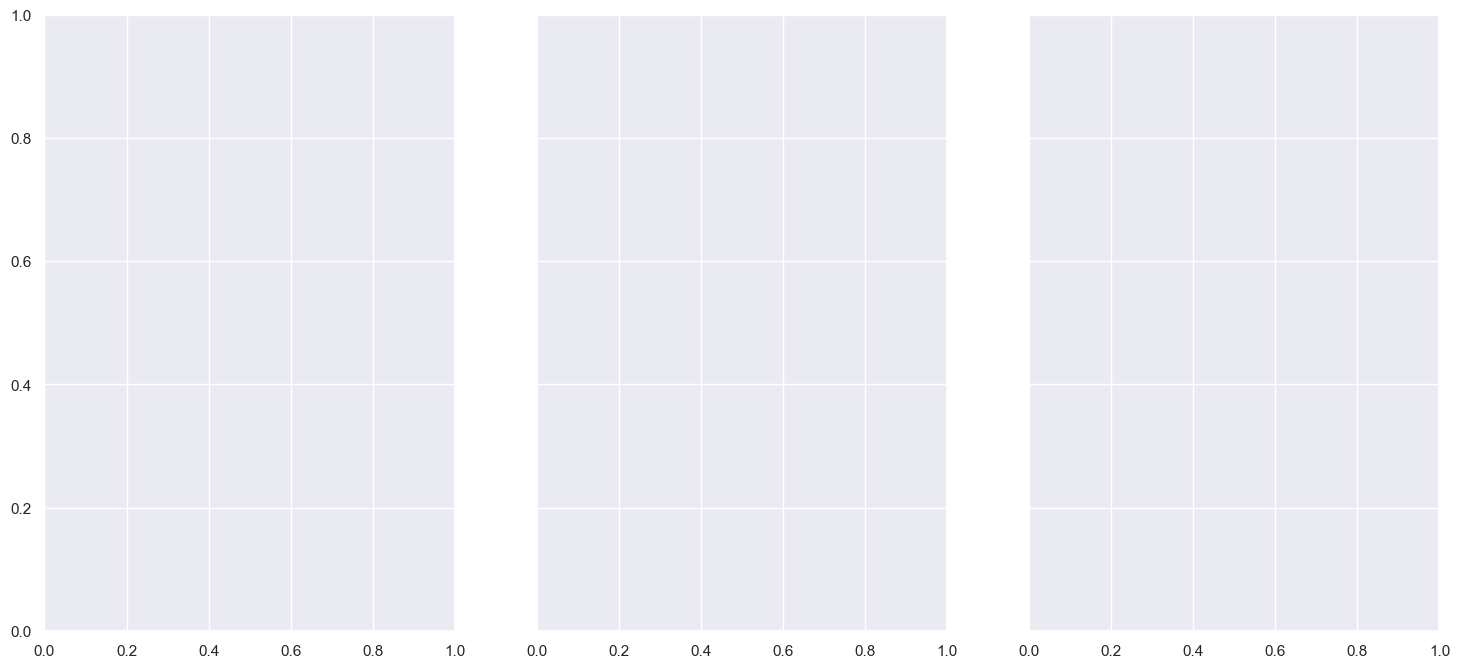

In [24]:
# ========== EXAMPLE 1: SINGLE DATAFRAME USAGE (BACKWARD COMPATIBLE) ==========
# Climate sensitivity analysis - all data comes from the same DataFrame

scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

# HEATING: Climate NPV Sensitivity Analysis (Single DataFrame)
fig_heating_climate_sensitivity = create_subplot_grid_histogram(
    df=df_outputs_basic_home_ap2,  # Single DataFrame (backward compatible)
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_lower_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_upper_ap2_acs'
    ],
    x_labels=[
        '',
        'Total NPV, More WTP (Assumes Net Capital Cost + Public NPV) [$USD-2023]',
        ''
    ],
    y_label='Representative Dwelling Units',
    lower_percentile=1,    # Optional: limit display range
    upper_percentile=99,   # Optional: limit display range
    subplot_titles=['Lower Bound', 'Central Estimate', 'Upper Bound'],
    suptitle=f'{category.title()} SCC and Subsidy-Dependent Adoption Potential (with ap2-ACS Health Sensitivity)',
    figure_size=(18, 8),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel'
)

print_positive_percentages_complete(
    df=df_outputs_basic_home_ap2,  # Single DataFrame (backward compatible)
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_lower_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_upper_ap2_acs'
    ],
    subplot_titles=['Lower Bound', 'Central Estimate', 'Upper Bound'],
    fuel_column=f'base_{category}_fuel'
)

In [ ]:
# ========== EXAMPLE 1: SINGLE DATAFRAME USAGE (BACKWARD COMPATIBLE) ==========
# Climate sensitivity analysis - all data comes from the same DataFrame

scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

# HEATING: Climate NPV Sensitivity Analysis (Single DataFrame)
fig_heating_climate_sensitivity = create_subplot_grid_histogram(
    df=df_outputs_basic_home_ap2,  # Single DataFrame (backward compatible)
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_lower_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_upper_ap2_acs'
    ],
    x_labels=[
        '',
        'Total NPV, More WTP (Assumes Net Capital Cost + Public NPV) [$USD-2023]',
        ''
    ],
    y_label='Representative Dwelling Units',
    bin_number=100,  # Optional: number of bins for histogram
    lower_percentile=1,    # Optional: limit display range
    upper_percentile=99,   # Optional: limit display range
    subplot_titles=['Lower Bound', 'Central Estimate', 'Upper Bound'],
    suptitle=f'{category.title()} SCC and Subsidy-Dependent Adoption Potential (with ap2-ACS Health Sensitivity)',
    figure_size=(18, 8),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel'
)

print_positive_percentages_complete(
    df=df_outputs_basic_home_ap2,  # Single DataFrame (backward compatible)
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_lower_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_upper_ap2_acs'
    ],
    subplot_titles=['Lower Bound', 'Central Estimate', 'Upper Bound'],
    fuel_column=f'base_{category}_fuel'
)

In [ ]:
# ========== EXAMPLE 1: SINGLE DATAFRAME USAGE (BACKWARD COMPATIBLE) ==========
# Climate sensitivity analysis - all data comes from the same DataFrame

scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

# HEATING: Climate NPV Sensitivity Analysis (Single DataFrame)
fig_heating_climate_sensitivity = create_subplot_grid_histogram(
    df=df_outputs_basic_home_easiur,  # Single DataFrame (backward compatible)
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_lower_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_upper_easiur_acs'
    ],
    x_labels=[
        '',
        'Total NPV, More WTP (Assumes Net Capital Cost + Public NPV) [$USD-2023]',
        ''
    ],
    y_label='Representative Dwelling Units',
    lower_percentile=1,    # Optional: limit display range
    upper_percentile=99,   # Optional: limit display range
    subplot_titles=['Lower Bound', 'Central Estimate', 'Upper Bound'],
    suptitle=f'{category.title()} SCC and Subsidy-Dependent Adoption Potential (with easiur-ACS Health Sensitivity)',
    figure_size=(18, 8),
    sharex=False,
    sharey=True,
    color_code=f'base_{category}_fuel'
)

print_positive_percentages_complete(
    df=df_outputs_basic_home_easiur,  # Single DataFrame (backward compatible)
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_lower_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_upper_easiur_acs'
    ],
    subplot_titles=['Lower Bound', 'Central Estimate', 'Upper Bound'],
    fuel_column=f'base_{category}_fuel'
)

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from typing import List, Optional, Tuple, Dict, Union
# from matplotlib.ticker import FuncFormatter

# # Color mapping (keeping original style)
# color_map_fuel = {
#     'Electricity': 'seagreen',
#     'Natural Gas': 'steelblue',
#     'Propane': 'orange',
#     'Fuel Oil': 'gray',  # Changed to gray for accessibility
# }


# def thousands_formatter(x: float, pos: int) -> str:
#     """Format numbers to use K for thousands automatically.
    
#     Formats numeric values for axis labels, converting values >= 1000 to 
#     use 'K' suffix (e.g., 2500 becomes '2.5K'). Used as a matplotlib 
#     FuncFormatter for cleaner axis labels.
    
#     Args:
#         x: Numeric value to format
#         pos: Position parameter required by matplotlib FuncFormatter (unused)
        
#     Returns:
#         Formatted string representation of the number
        
#     Raises:
#         TypeError: If x cannot be converted to a numeric value
#     """
#     # Validate input
#     try:
#         x_float = float(x)
#     except (TypeError, ValueError):
#         return str(x)  # Return string representation instead of raising error
    
#     if abs(x_float) >= 1000:
#         return f'{x_float/1000:g}K'
#     else:
#         return f'{x_float:g}'


# def create_subplot_histogram(
#     ax: plt.Axes, 
#     df: pd.DataFrame, 
#     x_col: str, 
#     bin_number: Union[int, str] = 'auto',  # CHANGE: Allow 'auto' for intelligent binning
#     x_label: Optional[str] = None, 
#     y_label: Optional[str] = None, 
#     lower_percentile: Optional[float] = 2.5,  # CHANGE: Allow None 
#     upper_percentile: Optional[float] = 97.5,  # CHANGE: Allow None
#     color_code: str = 'base_fuel', 
#     statistic: str = 'count', 
#     include_zero: bool = False, 
#     show_legend: bool = False
# ) -> None:
#     """Creates a histogram on the provided axes using the specified DataFrame.
    
#     This function is designed to be used within a grid of subplots. It can optionally
#     limit the display range based on percentiles while showing all data, and creates 
#     a stacked histogram by fuel type with consistent formatting.
    
#     Args:
#         ax: Matplotlib Axes object where the histogram will be plotted
#         df: DataFrame containing the data to plot
#         x_col: Column name in df for x-axis data
#         bin_number: Number of bins for the histogram, or 'auto' for intelligent binning
#         x_label: Optional label for x-axis
#         y_label: Optional label for y-axis
#         lower_percentile: Lower percentile for display range (0-100), or None for no limit
#         upper_percentile: Upper percentile for display range (0-100), or None for no limit
#         color_code: Column name for color coding (usually fuel type)
#         statistic: Statistic to compute ('count', 'density', 'probability', etc.)
#         include_zero: Whether to include zero values in the visualization
#         show_legend: Whether to show legend on this subplot
        
#     Raises:
#         KeyError: If x_col or color_code columns don't exist in the DataFrame
#     """
#     # Minimal validation - just check for column existence
#     if x_col not in df.columns:
#         raise KeyError(f"Column '{x_col}' not found in DataFrame. Available columns: {list(df.columns)}")
    
#     # Create a copy to avoid modifying the original DataFrame
#     df_copy = df.copy()
    
#     # Handle zero values (keep original approach - correct for multi-appliance data)
#     if not include_zero:
#         df_copy[x_col] = df_copy[x_col].replace(0, np.nan)

#     # FIXED: Calculate percentile limits for DISPLAY only (don't filter the data)
#     if lower_percentile is not None and upper_percentile is not None:
#         lower_limit = df_copy[x_col].quantile(lower_percentile / 100)
#         upper_limit = df_copy[x_col].quantile(upper_percentile / 100)
#     else:
#         lower_limit = None
#         upper_limit = None

#     # Set the hue_order to match the unique fuel categories that exist in color_map
#     hue_order = [fuel for fuel in df_copy[color_code].unique() if fuel in color_map_fuel]
    
#     # Get colors only for the fuels that actually exist in the data (prevents palette warning)
#     colors = [color_map_fuel[fuel] for fuel in hue_order]

#     # FIXED: Create the histogram using column name consistently (no filtered Series)
#     sns.histplot(
#         data=df_copy,       # Full DataFrame (NaN values automatically excluded)
#         x=x_col,           # Column name (not filtered Series!)
#         kde=False, 
#         bins=bin_number,   # Now supports 'auto' 
#         hue=color_code, 
#         hue_order=hue_order, 
#         stat=statistic, 
#         multiple="stack", 
#         palette=colors, 
#         ax=ax, 
#         legend=show_legend
#     )

#     # Set labels if provided
#     if x_label is not None:
#         ax.set_xlabel(x_label, fontsize=22)

#     if y_label is not None:
#         ax.set_ylabel(y_label, fontsize=22)

#     # FIXED: Set axis limits for DISPLAY only (optional, based on percentiles)
#     if lower_limit is not None and upper_limit is not None:
#         ax.set_xlim(left=lower_limit, right=upper_limit)
    
#     ax.tick_params(axis='both', labelsize=22)

#     # Add vertical reference line at x=0
#     ax.axvline(x=0, color='black', linestyle='--', linewidth=3, alpha=0.8, zorder=10)
    
#     # Format axis labels to use K for thousands
#     ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
#     ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    
#     # Remove top and right spines for cleaner appearance
#     sns.despine()


# def create_subplot_grid_histogram(
#     df: Optional[pd.DataFrame] = None,                    # Single DataFrame (backward compatible)
#     dataframes: Optional[List[pd.DataFrame]] = None,      # Multiple DataFrames
#     dataframe_indices: Optional[List[int]] = None,        # DataFrame mapping
#     subplot_positions: Optional[List[Tuple[int, int]]] = None, 
#     x_cols: Optional[List[str]] = None, 
#     x_labels: Optional[List[str]] = None, 
#     y_label: Optional[str] = None,
#     y_labels: Optional[List[str]] = None,                 # Individual y-labels
#     bin_number: Union[int, str] = 'auto',                 # CHANGE: Default to 'auto' for intelligent binning
#     lower_percentile: Optional[float] = None,             # CHANGE: Default to None (show full range)
#     upper_percentile: Optional[float] = None,             # CHANGE: Default to None (show full range)
#     statistic: str = 'count', 
#     color_code: str = 'base_fuel', 
#     include_zero: bool = False,                           # Keep original default (zero → NaN is correct)
#     suptitle: Optional[str] = None, 
#     sharex: bool = False, 
#     sharey: bool = False, 
#     subplot_titles: Optional[List[str]] = None, 
#     show_legend: bool = False,                            # Changed default to False
#     figure_size: Tuple[int, int] = (12, 10)
# ) -> plt.Figure:
#     """Creates a grid of histograms with support for single or multiple DataFrames.
    
#     This function creates a customizable grid of histograms with flexible DataFrame handling.
#     It supports both single DataFrame (backward compatible) and multiple DataFrame modes.
    
#     UPDATED: Now shows full data range by default, with optional display range limiting.
    
#     Args:
#         df: Single DataFrame for backward compatibility
#         dataframes: List of DataFrames for multi-DataFrame visualizations
#         dataframe_indices: List of indices mapping subplot positions to DataFrames
#         subplot_positions: List of (row, column) tuples for subplot placement
#         x_cols: List of column names for x-axis data in each subplot
#         x_labels: Optional list of x-axis labels for each subplot
#         y_label: Global y-axis label applied to all subplots (if y_labels not provided)
#         y_labels: Optional list of individual y-axis labels for each subplot
#         bin_number: Number of bins for the histograms, or 'auto' for intelligent binning
#         lower_percentile: Lower percentile for display range (0-100), or None for full range
#         upper_percentile: Upper percentile for display range (0-100), or None for full range
#         statistic: Statistic to compute ('count', 'density', 'probability', etc.)
#         color_code: Column name for color coding (usually fuel type)
#         include_zero: Whether to include zero values in the visualization
#         suptitle: Super title for the entire figure
#         sharex: Whether to share x-axes across subplots
#         sharey: Whether to share y-axes across subplots
#         subplot_titles: Optional list of titles for each column
#         show_legend: Whether to show legend for each subplot
#         figure_size: Size of the figure as (width, height) in inches
        
#     Returns:
#         Matplotlib Figure object containing the grid of histograms
        
#     Raises:
#         ValueError: If input parameters are invalid or inconsistent
#         KeyError: If specified columns don't exist in the DataFrame(s)
#     """
#     # Simple input validation (original style - minimal)
#     if df is not None and dataframes is not None:
#         raise ValueError("Specify either 'df' or 'dataframes', not both")
#     if df is None and dataframes is None:
#         raise ValueError("Must specify either 'df' or 'dataframes'")
#     if subplot_positions is None or not subplot_positions:
#         raise ValueError("subplot_positions must be provided and non-empty")
#     if x_cols is None or not x_cols:
#         raise ValueError("x_cols must be provided and non-empty")
#     if len(subplot_positions) != len(x_cols):
#         raise ValueError(f"Number of subplot positions ({len(subplot_positions)}) must match number of x columns ({len(x_cols)})")
    
#     # Set up DataFrame handling (same as before)
#     if df is not None:
#         # Single DataFrame mode (original behavior)
#         df_list = [df]
#         df_indices = [0] * len(subplot_positions)
#     else:
#         # Multiple DataFrame mode
#         df_list = dataframes
#         if dataframe_indices is None:
#             df_indices = [i % len(dataframes) for i in range(len(subplot_positions))]
#         else:
#             if len(dataframe_indices) != len(subplot_positions):
#                 raise ValueError("dataframe_indices length must match number of subplots")
#             df_indices = dataframe_indices
    
#     # Original grid setup logic (unchanged)
#     num_subplots = len(subplot_positions)
#     num_cols = max(pos[1] for pos in subplot_positions) + 1
#     num_rows = max(pos[0] for pos in subplot_positions) + 1

#     fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figure_size, sharex=sharex, sharey=sharey)

#     # Ensure axes is always 2D for consistent indexing
#     if num_rows == 1 and num_cols == 1:
#         axes = np.array([[axes]])  # Single subplot
#     elif num_rows == 1:
#         axes = np.array([axes])    # Single row, multiple columns
#     elif num_cols == 1:
#         axes = np.array([[ax] for ax in axes])  # Multiple rows, single column

#     # Original dictionary mapping approach
#     subplot_axes = {(pos[0], pos[1]): axes[pos[0], pos[1]] for pos in subplot_positions}

#     # Create histograms with updated function
#     for i, (pos, x_col) in enumerate(zip(subplot_positions, x_cols)):
#         # Get the appropriate DataFrame for this subplot
#         current_df = df_list[df_indices[i]]
        
#         # Check column existence just once before calling helper function
#         if x_col not in current_df.columns:
#             raise KeyError(f"Column '{x_col}' not found in DataFrame at index {df_indices[i]}. Available columns: {list(current_df.columns)}")
        
#         # Get labels
#         x_label = x_labels[i] if x_labels else None
#         current_y_label = y_labels[i] if y_labels else y_label
        
#         # Create histogram using updated function
#         create_subplot_histogram(
#             ax=subplot_axes[pos],
#             df=current_df,
#             x_col=x_col,
#             bin_number=bin_number,          # Now supports 'auto'
#             x_label=x_label,
#             y_label=current_y_label,
#             lower_percentile=lower_percentile,  # Now defaults to None
#             upper_percentile=upper_percentile,  # Now defaults to None
#             statistic=statistic,
#             color_code=color_code,
#             include_zero=include_zero,
#             show_legend=show_legend
#         )

#     # Original title logic (unchanged)
#     if suptitle:
#         plt.suptitle(suptitle, fontweight='bold', fontsize=22)

#     # FIXED: Apply subplot titles to individual subplot positions, not just top row  
#     if subplot_titles:
#         for i, (pos, title) in enumerate(zip(subplot_positions, subplot_titles)):
#             if i < len(subplot_titles):
#                 subplot_axes[pos].set_title(title, fontsize=22, fontweight='bold')

#     # Original legend logic below (unchanged)
#     legend_labels = list(color_map_fuel.keys())
#     legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_map_fuel[label]) for label in legend_labels]
#     fig.legend(
#         legend_handles, 
#         legend_labels, 
#         loc='lower center', 
#         ncol=len(legend_labels), 
#         prop={'size': 22}, 
#         labelspacing=0.5, 
#         bbox_to_anchor=(0.5, -0.05)
#     )             
    
#     # Original layout logic with room for legend
#     plt.tight_layout(rect=[0, 0.05, 1, 1])
    
#     return fig


# def print_positive_percentages_complete(
#     df: Optional[pd.DataFrame] = None,
#     dataframes: Optional[List[pd.DataFrame]] = None,
#     dataframe_indices: Optional[List[int]] = None,
#     column_names: List[str] = None,
#     subplot_titles: Optional[List[str]] = None,
#     fuel_column: str = 'base_fuel'
# ):
#     """
#     Print the percentage of positive values for each specified column across single or multiple DataFrames,
#     with a breakdown by fuel type and information about missing/invalid data.
    
#     Args:
#         df: Single DataFrame for backward compatibility
#         dataframes: List of DataFrames for multi-DataFrame analysis
#         dataframe_indices: List of indices mapping columns to DataFrames
#         column_names: List of column names to analyze
#         subplot_titles: Optional list of display titles for each column
#         fuel_column: Column name containing fuel type information
#     """
#     # Input validation
#     if df is not None and dataframes is not None:
#         print("Error: Specify either 'df' or 'dataframes', not both")
#         return
#     if df is None and dataframes is None:
#         print("Error: Must specify either 'df' or 'dataframes'")
#         return
#     if column_names is None or not column_names:
#         print("Error: column_names must be provided and non-empty")
#         return
    
#     # Set up DataFrame handling
#     if df is not None:
#         # Single DataFrame mode (original behavior)
#         df_list = [df]
#         df_indices = [0] * len(column_names)
#     else:
#         # Multiple DataFrame mode
#         df_list = dataframes
#         if dataframe_indices is None:
#             df_indices = [i % len(dataframes) for i in range(len(column_names))]
#         else:
#             if len(dataframe_indices) != len(column_names):
#                 print("Error: dataframe_indices length must match number of columns")
#                 return
#             df_indices = dataframe_indices
    
#     # Get the known fuel types we want to report on (hard-coded to avoid sorting issues)
#     # These should match the names in your color_map_fuel dictionary
#     known_fuel_types = ['Electricity', 'Natural Gas', 'Propane', 'Fuel Oil']
    
#     for i, col in enumerate(column_names):
#         # Get the appropriate DataFrame for this column
#         current_df = df_list[df_indices[i]]
        
#         # Check if column exists in the current DataFrame
#         if col not in current_df.columns:
#             print(f"Warning: Column '{col}' not found in DataFrame at index {df_indices[i]}. Available columns: {list(current_df.columns)[:10]} ...")
#             continue
            
#         # Check if fuel column exists in the current DataFrame
#         if fuel_column not in current_df.columns:
#             print(f"Warning: Fuel column '{fuel_column}' not found in DataFrame at index {df_indices[i]}. Available columns: {list(current_df.columns)[:10]} ...")
#             continue
        
#         # Get display name
#         display_name = subplot_titles[i] if subplot_titles and i < len(subplot_titles) else col
        
#         print(f"\n===== {display_name} =====")
        
#         # Get total number of rows in the DataFrame
#         total_df_rows = len(current_df)
        
#         # Calculate overall statistics for non-NaN values
#         total_non_nan = current_df[col].count()
#         positive_count = (current_df[col] > 0).sum()
#         positive_percentage = (positive_count / total_non_nan * 100) if total_non_nan > 0 else 0
        
#         print(f"All: {positive_percentage:.1f}% positive ({positive_count:,} of {total_non_nan:,} values)")
        
#         # Track the total rows accounted for by known fuel types
#         accounted_rows = 0
        
#         # Calculate statistics for each known fuel type
#         for fuel in known_fuel_types:
#             # Filter by fuel type
#             fuel_data = current_df[current_df[fuel_column] == fuel]
            
#             # Skip if no data for this fuel type
#             if len(fuel_data) == 0:
#                 continue
                
#             # Count rows for this fuel type
#             fuel_rows = len(fuel_data)
#             accounted_rows += fuel_rows
                
#             # Count non-NaN values for this column
#             fuel_total = fuel_data[col].count()
            
#             # Count positive values
#             fuel_positive = (fuel_data[col] > 0).sum()
            
#             # Calculate percentage
#             fuel_percentage = (fuel_positive / fuel_total * 100) if fuel_total > 0 else 0
            
#             # Print results
#             print(f"{fuel}: {fuel_percentage:.1f}% positive ({fuel_positive:,} of {fuel_total:,} values)")
        
#         # Calculate remaining/unaccounted rows (either "Other Fuel" or NaN values)
#         unaccounted_rows = total_df_rows - accounted_rows
#         unaccounted_percentage = (unaccounted_rows / total_df_rows * 100)
        
#         print(f"\nHomes with \"Other Fuel\" (Invalid Fuel/Tech) make up the remaining {unaccounted_rows:,} of {total_df_rows:,} total dataframe rows ({unaccounted_percentage:.1f}%).")
#         print(f"NaN values in column: {total_df_rows - total_non_nan:,} rows ({((total_df_rows - total_non_nan) / total_df_rows * 100):.1f}% of dataframe)")


In [ ]:
# 2x2 Grid: Private NPV Baseline vs. SCC Climate Impact Bounds

scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

# HEATING: Private vs Public NPV Analysis (2x2 Grid)
fig_heating_private_vs_public = create_subplot_grid_histogram(
    df=df_outputs_basic_home_ap2,  # Single DataFrame
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1)],  # 2x2 grid
    x_cols=[
        f'{scenario_prefix}{category}_private_npv_moreWTP',              # Top-left: Private baseline
        f'{scenario_prefix}{category}_total_npv_moreWTP_lower_ap2_acs',  # Top-right: Lower bound
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs', # Bottom-left: Central
        f'{scenario_prefix}{category}_total_npv_moreWTP_upper_ap2_acs'   # Bottom-right: Upper
    ],
    x_labels=[
        'Private NPV [$USD-2023]',  # Top-left
        'Total NPV [$USD-2023]',    # Top-right  
        'Total NPV [$USD-2023]',    # Bottom-left
        'Total NPV [$USD-2023]'     # Bottom-right
    ],
    y_labels=[
        'Representative Dwelling Units',  # Top-left
        '',                              # Top-right (shared y-axis)
        'Representative Dwelling Units',  # Bottom-left  
        ''                               # Bottom-right (shared y-axis)
    ],
    bin_number=100,  # Number of bins for histogram
    lower_percentile=1,    # Show nearly full range
    upper_percentile=99,   # Show nearly full range
    subplot_titles=[
        'Private NPV (More WTP), No Climate Impacts',
        'Total NPV, More WTP - \n(Total NPV, More WTP + Lower Bound SCC)',
        'More WTP - Central Estimate\n(Total NPV, More WTP + Central Estimate SCC)', 
        'More WTP - Upper Bound\n(Total NPV, More WTP + Upper Bound SCC)'
    ],
    suptitle=f'{category.title()}: Private vs. Public NPV with SCC Climate Impact Sensitivity',
    figure_size=(16, 12),  # Larger for 2x2 grid
    sharex=False,  # Different scales between private and public
    sharey=False,  # Different y-scales may be needed
    color_code=f'base_{category}_fuel'
)

# Print comparison statistics
print("="*60)
print("PRIVATE vs PUBLIC NPV COMPARISON")
print("="*60)

print_positive_percentages_complete(
    df=df_outputs_basic_home_ap2,
    column_names=[
        f'{scenario_prefix}{category}_private_npv_moreWTP',              # Private baseline
        f'{scenario_prefix}{category}_total_npv_moreWTP_lower_ap2_acs',  # Lower bound
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs', # Central
        f'{scenario_prefix}{category}_total_npv_moreWTP_upper_ap2_acs'   # Upper
    ],
    subplot_titles=[
        'Private NPV Only (Baseline)', 
        'Lower Bound SCC (+ Climate)', 
        'Central Estimate SCC (+ Climate)', 
        'Upper Bound SCC (+ Climate)'
    ],
    fuel_column=f'base_{category}_fuel'
)

# plt.show()

In [ ]:
# Enhanced 2x2 Grid: Private NPV vs. Total NPV with SCC Climate Impact Sensitivity

scenario_prefix = 'iraRef_mp8_'
category = 'heating'

# HEATING: Private vs Public NPV Analysis with Climate Impact Sensitivity
fig_heating_private_vs_public = create_subplot_grid_histogram(
    df=df_outputs_basic_home_ap2,
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1)],  # 2x2 grid
    x_cols=[
        f'{scenario_prefix}{category}_private_npv_moreWTP',              # Top-left: Private baseline
        f'{scenario_prefix}{category}_total_npv_moreWTP_lower_ap2_acs',  # Top-right: Lower bound SCC
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs', # Bottom-left: Central SCC
        f'{scenario_prefix}{category}_total_npv_moreWTP_upper_ap2_acs'   # Bottom-right: Upper SCC
    ],
    x_labels=[
        'Private NPV [$USD-2023]',      # Top-left
        'Total NPV [$USD-2023]',        # Top-right  
        'Total NPV [$USD-2023]',        # Bottom-left
        'Total NPV [$USD-2023]'         # Bottom-right
    ],
    y_labels=[
        'Representative Dwelling Units',  # Top-left
        'Representative Dwelling Units',  # Top-right (show for clarity)
        'Representative Dwelling Units',  # Bottom-left  
        'Representative Dwelling Units'   # Bottom-right (show for clarity)
    ],
    # bin_number=100,  # Optional: number of bins for histogram
    lower_percentile=1,
    upper_percentile=99,
    subplot_titles=[
        'Private NPV, Assuming Net Capital Costs\n(More WTP)',
        'More WTP - Lower Bound\n(Total NPV, More WTP + Lower Bound SCC)',
        'More WTP - Central Estimate\n(Total NPV, More WTP + Central Estimate SCC)', 
        'More WTP - Upper Bound\n(Total NPV, More WTP + Upper Bound SCC)'
    ],
    suptitle=f'{category.title()}: Private vs. Public NPV with SCC Climate Impact Sensitivity',
    figure_size=(16, 12),
    sharex=False,  # Different scales needed
    sharey=True,   # Same y-scale for better comparison
    color_code=f'base_{category}_fuel',
)

In [ ]:
fig_heating_alternative_1 = create_subplot_grid_histogram(
    df=df_outputs_basic_home_ap2,  
    subplot_positions=[(0, 0), (0, 1), (0, 2), (0, 3)],  # 1x4 grid
    x_cols=[
        f'{scenario_prefix}{category}_private_npv_moreWTP',
        f'{scenario_prefix}{category}_total_npv_lessWTP_climateOnly_lower',
        f'{scenario_prefix}{category}_total_npv_lessWTP_climateOnly_central',
        f'{scenario_prefix}{category}_total_npv_lessWTP_climateOnly_upper'
    ],
    x_labels=['Private NPV [$USD-2023]'] + ['Total NPV [$USD-2023]'] * 3,
    y_labels=['Dwelling Units', '', '', ''],
    bin_number=100,  # Optional: number of bins for histogram
    lower_percentile=1,    # Show nearly full range
    upper_percentile=99,   # Show nearly full range
    subplot_titles=[
        'Private NPV Only',
        'Climate Impacts: Lower Bound',
        'Climate Impacts: Central Estimate',
        'Climate Impacts: Upper Bound' 
    ],
    # suptitle=f'{category.title()}: Progressive Impact of Climate Benefit Valuation',
    figure_size=(24, 10),  # Wide format for 4 panels
    sharex=False,  # Keep different scales to show full distributions
    sharey=True,   # Same y-scale for comparison
    color_code=f'base_{category}_fuel'
)

In [ ]:
# Climate Damages Sensitivity Analysis
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_climate_damages = create_subplot_grid_boxplot(
    df=df_outputs_basic_home_easiur,  # Single DataFrame with all data
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    y_cols=[
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_lower',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_central',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_upper'
    ],
    category_col='tenure',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['Lower Bound', 'Central Estimate', 'Upper Bound'],
    x_labels=['', '', ''],
    y_labels=['Avoided Lifetime Climate Damages [$USD-2023]', '', ''],
    figure_size=(18, 8),
    show_outliers=False,
    # palette=color_map_fuel
)

In [ ]:
# Climate Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

summarize_stats_table(
    df=df_outputs_basic_home_easiur,  # Single DataFrame with all data
    data_columns=[
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_lower',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_central',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_upper'
    ],
    column_name_mapping={
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_lower': 'Lower Bound',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_central': 'Central Estimate',
        f'{scenario_prefix}{category}_avoided_damages_climate_lrmer_upper': 'Upper Bound'
    },
    number_formatting=".2f",
    include_zero=False,
    category=category,
    enable_fuel_filter=True,
    included_fuel_list=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane']
)

In [ ]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

summarize_stats_table(
    df=df_outputs_basic_home_ap2,  # Single DataFrame with all data
    data_columns=[
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_acs',  # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_h6c',  # AP2-H6C from df_ap2
    ],
    column_name_mapping={
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_acs': 'AP2-ACS',
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_h6c': 'AP2-H6C'
    },
    number_formatting=".2f",
    include_zero=False,
    category=category,
    enable_fuel_filter=True,
    included_fuel_list=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane']
)


In [ ]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

summarize_stats_table(
    df=df_outputs_basic_home_easiur,  # Single DataFrame with all data
    data_columns=[
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_h6c',  # EASIUR-H6C from df_easiur
    ],
    column_name_mapping={
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_acs': 'EASIUR-ACS',
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_h6c': 'EASIUR-H6C'
    },
    number_formatting=".2f",
    include_zero=False,
    category=category,
    enable_fuel_filter=True,
    included_fuel_list=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane']
)

In [ ]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

summarize_stats_table(
    df=df_outputs_basic_home_inmap,  # Single DataFrame with all data
    data_columns=[
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_acs',  # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_h6c',  # InMAP-H6C from df_inmap
    ],
    column_name_mapping={
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_acs': 'InMAP-ACS',
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_h6c': 'InMAP-H6C'
    },
    number_formatting=".2f",
    include_zero=False,
    category=category,
    enable_fuel_filter=True,
    included_fuel_list=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane']
)

In [ ]:
run_corrected_validation_tests(
    df_climate=df_mp8_IRA_damages_climate,  # Replace with your actual DataFrame
    df_health=df_mp8_IRA_damages_health,      # Replace with your actual DataFrame
    df_npv=df_outputs_basic_home_easiur       # Replace with your actual DataFrame
)

In [ ]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_HEATING_avoid_health_lmi_status = create_subplot_grid_boxplot(
    df=df_outputs_basic_home_easiur,  # Single DataFrame with all data
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    y_cols=[
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_acs',
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_acs',
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_acs'
    ],
    category_col='lmi_or_mui',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['AP2 with ACS CR-Function', 'EASIUR with ACS CR-Function', 'InMAP with ACS CR-Function'],
    x_labels=['', '', ''],
    y_labels=['Avoided Health Damages [$USD2023]', '', ''],
    figure_size=(16, 8),
    show_outliers=False,
    palette=color_map_fuel
)

### Varying SCC on Subsidy Dependent Feasibility Outcomes (with InMAP-ACS)

# SENSITIVITY ANALYSIS: Public Health Impact with Different Reduced Complexity Models and Concentration Response Functions

In [ ]:
print(df_outputs_basic_home_ap2.columns.to_list())

## Discounted Avoided Damages

### Air-Source Heat Pumps (ASHP)

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_acs',
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_h6c',
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_acs',
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_h6c',
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_acs',
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_h6c'
    ],
    x_labels=['', '', '', '', '', ''],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Air-Source Heat Pumps (MP8): Avoided Health Damages by RCM and CR Function',
    figure_size=(18, 12),
    sharex=False,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_avoided_damages_health_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_avoided_damages_health_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_avoided_damages_health_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

### Water Heating

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'waterHeating'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=[
        '', '', '',
        '', 'Total NPV, More WTP (Assumes Net Capital Cost + Public NPV) [$USD-2023]', ''
        ],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Heat Pump Water Heaters (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

### Clothes Drying

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'clothesDrying'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=[
        '', '', '',
        '', '', ''
        ],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Heat Pump Clothes Dryers (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

### Electric Cooking Ranges

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'cooking'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=[
        '', '', '',
        '', '', ''
        ],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Electric Cooking Ranges (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

## Health Impact and Subsidy-Dependent Adoption Potential

### Air-Source Heat Pumps (ASHP)

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=['', '', '', '', '', ''],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Air-Source Heat Pumps (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

### Water Heating

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'waterHeating'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=[
        '', '', '',
        '', 'Total NPV, More WTP (Assumes Net Capital Cost + Public NPV) [$USD-2023]', ''
        ],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Heat Pump Water Heaters (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

### Clothes Drying

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'clothesDrying'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=[
        '', '', '',
        '', '', ''
        ],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Heat Pump Clothes Dryers (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

### Electric Cooking Ranges

In [ ]:
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'cooking'

fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur,
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],
    subplot_positions=[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
    ],
    x_labels=[
        '', '', '',
        '', '', ''
        ],
    y_labels=[
        '', '',
        'Number of Representative Dwelling Units', '',
        '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    suptitle=f'Electric Cooking Ranges (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(18, 12),
    sharex=True,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Example with multiple dataframes
print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,      # DataFrame index 0
        df_outputs_basic_home_easiur,   # DataFrame index 1  
        df_outputs_basic_home_inmap     # DataFrame index 2
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # Which dataframe to use for each column
    column_names=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs',     # AP2-ACS from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c',     # AP2-H6C from df_ap2
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs',  # EASIUR-ACS from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c',  # EASIUR-H6C from df_easiur
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',   # InMAP-ACS from df_inmap
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'    # InMAP-H6C from df_inmap
    ],
    subplot_titles=[
        'AP2 Model - ACS Function', 'AP2 Model - H6C Function',
        'EASIUR Model - ACS Function', 'EASIUR Model - H6C Function',
        'InMAP Model - ACS Function', 'InMAP Model - H6C Function'
    ],
    fuel_column=f'base_{category}_fuel'
)

In [ ]:
fig_heating_health_sensitivity = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2, df_outputs_basic_home_easiur, df_outputs_basic_home_inmap,
        df_outputs_basic_home_ap2, df_outputs_basic_home_easiur, df_outputs_basic_home_inmap  
        ],
    dataframe_indices=[0, 1, 2, 0, 1, 2],  # Changed from [0, 0, 0, 1, 1, 1]
    subplot_positions=[
        (0, 0), (0, 1), (0, 2),
        (1, 0), (1, 1), (1, 2)
        ],
    x_cols=[
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_acs', 
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_acs', 
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_acs',
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_ap2_h6c', 
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_easiur_h6c', 
        f'{scenario_prefix}{category}_total_npv_moreWTP_central_inmap_h6c'
        ],
   x_labels=[
        '', '', '',
        '', '', ''
    ],
    y_labels=[
        '', '', '',
        '', '', '',
    ],
    # Individual subplot titles
    subplot_titles=[
        'AP2 Model - ACS Function', 'EASIUR Model - ACS Function', 'InMAP Model - ACS Function',
        'AP2 Model - H6C Function', 'EASIUR Model - H6C Function', 'InMAP Model - H6C Function',
    ],
    suptitle=f'Air-Source Heat Pumps (MP8): Health NPV Sensitivity Analysis (Central SCC Assumption)',
    figure_size=(16, 12),
    sharex=False,
    sharey=True,
    color_code=f'base_{category}_fuel',
    show_legend=False
)

# Model Runtime

In [ ]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")